# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learing. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gymnasium as gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gymnasium as gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11642/6000000 [00:00<00:51, 116414.28it/s]

  0%|          | 23507/6000000 [00:00<00:50, 117723.18it/s]

  1%|          | 35695/6000000 [00:00<00:49, 119617.08it/s]

  1%|          | 47657/6000000 [00:00<00:49, 119254.05it/s]

  1%|          | 59583/6000000 [00:00<00:49, 118923.47it/s]

  1%|          | 71476/6000000 [00:00<00:50, 118541.98it/s]

  1%|▏         | 83558/6000000 [00:00<00:49, 119282.82it/s]

  2%|▏         | 95487/6000000 [00:00<00:49, 118954.12it/s]

  2%|▏         | 107383/6000000 [00:00<00:49, 117929.53it/s]

  2%|▏         | 119394/6000000 [00:01<00:49, 118595.32it/s]

  2%|▏         | 131364/6000000 [00:01<00:49, 118930.36it/s]

  2%|▏         | 143326/6000000 [00:01<00:49, 119137.58it/s]

  3%|▎         | 155287/6000000 [00:01<00:49, 119278.50it/s]

  3%|▎         | 167267/6000000 [00:01<00:48, 119433.75it/s]

  3%|▎         | 179314/6000000 [00:01<00:48, 119742.76it/s]

  3%|▎         | 191303/6000000 [00:01<00:48, 119786.13it/s]

  3%|▎         | 203282/6000000 [00:01<00:48, 119578.90it/s]

  4%|▎         | 215292/6000000 [00:01<00:48, 119732.08it/s]

  4%|▍         | 227266/6000000 [00:01<00:48, 119343.32it/s]

  4%|▍         | 239201/6000000 [00:02<00:48, 119248.17it/s]

  4%|▍         | 251127/6000000 [00:02<00:48, 119062.35it/s]

  4%|▍         | 263053/6000000 [00:02<00:48, 119119.05it/s]

  5%|▍         | 274966/6000000 [00:02<00:48, 118654.35it/s]

  5%|▍         | 286832/6000000 [00:02<00:48, 118571.27it/s]

  5%|▍         | 298690/6000000 [00:02<00:48, 118059.03it/s]

  5%|▌         | 310570/6000000 [00:02<00:48, 118274.35it/s]

  5%|▌         | 322398/6000000 [00:02<00:48, 117609.69it/s]

  6%|▌         | 334353/6000000 [00:02<00:47, 118187.21it/s]

  6%|▌         | 346268/6000000 [00:02<00:47, 118472.29it/s]

  6%|▌         | 358117/6000000 [00:03<00:47, 118266.58it/s]

  6%|▌         | 369954/6000000 [00:03<00:47, 118295.68it/s]

  6%|▋         | 381793/6000000 [00:03<00:47, 118321.32it/s]

  7%|▋         | 393680/6000000 [00:03<00:47, 118484.06it/s]

  7%|▋         | 405529/6000000 [00:03<00:47, 118382.87it/s]

  7%|▋         | 417460/6000000 [00:03<00:47, 118659.11it/s]

  7%|▋         | 429327/6000000 [00:03<00:47, 118493.33it/s]

  7%|▋         | 441177/6000000 [00:03<00:47, 118206.79it/s]

  8%|▊         | 453069/6000000 [00:03<00:46, 118418.31it/s]

  8%|▊         | 464912/6000000 [00:03<00:47, 117734.08it/s]

  8%|▊         | 476896/6000000 [00:04<00:46, 118361.15it/s]

  8%|▊         | 488734/6000000 [00:04<00:55, 98799.87it/s] 

  8%|▊         | 500755/6000000 [00:04<00:52, 104422.86it/s]

  9%|▊         | 512669/6000000 [00:04<00:50, 108437.17it/s]

  9%|▊         | 524491/6000000 [00:04<00:49, 111179.64it/s]

  9%|▉         | 536493/6000000 [00:04<00:48, 113707.70it/s]

  9%|▉         | 548369/6000000 [00:04<00:47, 115171.38it/s]

  9%|▉         | 560092/6000000 [00:04<00:46, 115773.47it/s]

 10%|▉         | 572214/6000000 [00:04<00:46, 117379.10it/s]

 10%|▉         | 584120/6000000 [00:04<00:45, 117874.98it/s]

 10%|▉         | 596109/6000000 [00:05<00:45, 118471.99it/s]

 10%|█         | 607995/6000000 [00:05<00:45, 118535.58it/s]

 10%|█         | 619931/6000000 [00:05<00:45, 118779.92it/s]

 11%|█         | 631849/6000000 [00:05<00:45, 118897.83it/s]

 11%|█         | 643752/6000000 [00:05<00:45, 118721.61it/s]

 11%|█         | 655731/6000000 [00:05<00:44, 119039.41it/s]

 11%|█         | 667783/6000000 [00:05<00:44, 119480.96it/s]

 11%|█▏        | 679842/6000000 [00:05<00:44, 119812.05it/s]

 12%|█▏        | 691919/6000000 [00:05<00:44, 120097.22it/s]

 12%|█▏        | 703932/6000000 [00:05<00:44, 118768.01it/s]

 12%|█▏        | 715888/6000000 [00:06<00:44, 119001.73it/s]

 12%|█▏        | 727900/6000000 [00:06<00:44, 119333.67it/s]

 12%|█▏        | 739849/6000000 [00:06<00:44, 119378.62it/s]

 13%|█▎        | 752026/6000000 [00:06<00:43, 120093.14it/s]

 13%|█▎        | 764037/6000000 [00:06<00:43, 119803.45it/s]

 13%|█▎        | 776019/6000000 [00:06<00:43, 119270.04it/s]

 13%|█▎        | 787948/6000000 [00:06<00:43, 118833.87it/s]

 13%|█▎        | 799833/6000000 [00:06<00:43, 118764.18it/s]

 14%|█▎        | 811711/6000000 [00:06<00:43, 118460.59it/s]

 14%|█▎        | 823586/6000000 [00:06<00:43, 118544.80it/s]

 14%|█▍        | 835441/6000000 [00:07<00:43, 118472.01it/s]

 14%|█▍        | 847296/6000000 [00:07<00:43, 118494.02it/s]

 14%|█▍        | 859191/6000000 [00:07<00:43, 118629.96it/s]

 15%|█▍        | 871134/6000000 [00:07<00:43, 118866.76it/s]

 15%|█▍        | 883021/6000000 [00:07<00:43, 118599.57it/s]

 15%|█▍        | 894909/6000000 [00:07<00:43, 118680.49it/s]

 15%|█▌        | 906908/6000000 [00:07<00:42, 119070.35it/s]

 15%|█▌        | 918850/6000000 [00:07<00:42, 119172.35it/s]

 16%|█▌        | 930768/6000000 [00:07<00:42, 119074.94it/s]

 16%|█▌        | 942714/6000000 [00:07<00:42, 119186.70it/s]

 16%|█▌        | 954633/6000000 [00:08<00:42, 119034.77it/s]

 16%|█▌        | 966594/6000000 [00:08<00:42, 119205.75it/s]

 16%|█▋        | 978515/6000000 [00:08<00:42, 119137.00it/s]

 17%|█▋        | 990429/6000000 [00:08<00:42, 118946.14it/s]

 17%|█▋        | 1002415/6000000 [00:08<00:41, 119218.44it/s]

 17%|█▋        | 1014337/6000000 [00:08<00:41, 119193.82it/s]

 17%|█▋        | 1026458/6000000 [00:08<00:41, 119796.93it/s]

 17%|█▋        | 1038438/6000000 [00:08<00:41, 119150.95it/s]

 18%|█▊        | 1050354/6000000 [00:08<00:41, 118851.18it/s]

 18%|█▊        | 1062315/6000000 [00:08<00:41, 119075.73it/s]

 18%|█▊        | 1074224/6000000 [00:09<00:41, 119059.32it/s]

 18%|█▊        | 1086268/6000000 [00:09<00:41, 119471.93it/s]

 18%|█▊        | 1098289/6000000 [00:09<00:40, 119690.35it/s]

 19%|█▊        | 1110259/6000000 [00:09<00:40, 119538.45it/s]

 19%|█▊        | 1122214/6000000 [00:09<00:40, 119077.48it/s]

 19%|█▉        | 1134211/6000000 [00:09<00:40, 119340.90it/s]

 19%|█▉        | 1146146/6000000 [00:09<00:40, 119329.52it/s]

 19%|█▉        | 1158080/6000000 [00:09<00:40, 118834.36it/s]

 20%|█▉        | 1170038/6000000 [00:09<00:40, 119056.52it/s]

 20%|█▉        | 1182001/6000000 [00:10<00:40, 119038.27it/s]

 20%|█▉        | 1194001/6000000 [00:10<00:40, 118856.53it/s]

 20%|██        | 1206001/6000000 [00:10<00:40, 118930.09it/s]

 20%|██        | 1218061/6000000 [00:10<00:40, 119425.74it/s]

 21%|██        | 1230005/6000000 [00:10<00:40, 118910.46it/s]

 21%|██        | 1242142/6000000 [00:10<00:39, 119641.87it/s]

 21%|██        | 1254116/6000000 [00:10<00:39, 119670.03it/s]

 21%|██        | 1266084/6000000 [00:10<00:39, 119453.31it/s]

 21%|██▏       | 1278030/6000000 [00:10<00:40, 116916.22it/s]

 22%|██▏       | 1290001/6000000 [00:10<00:40, 117508.51it/s]

 22%|██▏       | 1302001/6000000 [00:11<00:39, 118132.31it/s]

 22%|██▏       | 1314001/6000000 [00:11<00:39, 118194.92it/s]

 22%|██▏       | 1326001/6000000 [00:11<00:39, 118241.17it/s]

 22%|██▏       | 1337978/6000000 [00:11<00:39, 118693.12it/s]

 22%|██▏       | 1349884/6000000 [00:11<00:39, 118800.43it/s]

 23%|██▎       | 1361777/6000000 [00:11<00:39, 118836.52it/s]

 23%|██▎       | 1373663/6000000 [00:11<00:39, 118467.13it/s]

 23%|██▎       | 1385511/6000000 [00:11<00:39, 118161.26it/s]

 23%|██▎       | 1397328/6000000 [00:11<00:39, 117482.37it/s]

 23%|██▎       | 1409136/6000000 [00:11<00:39, 117657.74it/s]

 24%|██▎       | 1421076/6000000 [00:12<00:38, 118175.14it/s]

 24%|██▍       | 1432895/6000000 [00:12<00:38, 117979.28it/s]

 24%|██▍       | 1444694/6000000 [00:12<00:38, 117838.77it/s]

 24%|██▍       | 1456666/6000000 [00:12<00:38, 118399.58it/s]

 24%|██▍       | 1468537/6000000 [00:12<00:38, 118489.97it/s]

 25%|██▍       | 1480458/6000000 [00:12<00:38, 118704.87it/s]

 25%|██▍       | 1492329/6000000 [00:12<00:37, 118637.62it/s]

 25%|██▌       | 1504193/6000000 [00:12<00:38, 118189.38it/s]

 25%|██▌       | 1516013/6000000 [00:12<00:38, 117792.13it/s]

 25%|██▌       | 1527793/6000000 [00:12<00:38, 117421.83it/s]

 26%|██▌       | 1539601/6000000 [00:13<00:37, 117616.70it/s]

 26%|██▌       | 1551433/6000000 [00:13<00:37, 117825.30it/s]

 26%|██▌       | 1563223/6000000 [00:13<00:37, 117847.09it/s]

 26%|██▋       | 1575165/6000000 [00:13<00:37, 118314.62it/s]

 26%|██▋       | 1587060/6000000 [00:13<00:37, 118501.95it/s]

 27%|██▋       | 1599001/6000000 [00:13<00:37, 118725.44it/s]

 27%|██▋       | 1611001/6000000 [00:13<00:36, 118794.75it/s]

 27%|██▋       | 1623001/6000000 [00:13<00:36, 119055.30it/s]

 27%|██▋       | 1635001/6000000 [00:13<00:36, 118807.37it/s]

 27%|██▋       | 1646997/6000000 [00:13<00:36, 119146.03it/s]

 28%|██▊       | 1658916/6000000 [00:14<00:36, 119156.41it/s]

 28%|██▊       | 1670832/6000000 [00:14<00:36, 118968.72it/s]

 28%|██▊       | 1682939/6000000 [00:14<00:36, 119593.72it/s]

 28%|██▊       | 1694899/6000000 [00:14<00:36, 119188.18it/s]

 28%|██▊       | 1706855/6000000 [00:14<00:35, 119295.77it/s]

 29%|██▊       | 1718785/6000000 [00:14<00:35, 119206.84it/s]

 29%|██▉       | 1730706/6000000 [00:14<00:36, 118538.18it/s]

 29%|██▉       | 1742717/6000000 [00:14<00:35, 119005.85it/s]

 29%|██▉       | 1754619/6000000 [00:14<00:35, 118712.24it/s]

 29%|██▉       | 1766491/6000000 [00:14<00:35, 118597.80it/s]

 30%|██▉       | 1778480/6000000 [00:15<00:35, 118983.32it/s]

 30%|██▉       | 1790379/6000000 [00:15<00:35, 118666.66it/s]

 30%|███       | 1802247/6000000 [00:15<00:35, 118268.36it/s]

 30%|███       | 1814121/6000000 [00:15<00:35, 118406.31it/s]

 30%|███       | 1826006/6000000 [00:15<00:35, 118537.38it/s]

 31%|███       | 1837861/6000000 [00:15<00:35, 118526.73it/s]

 31%|███       | 1849714/6000000 [00:15<00:35, 118425.43it/s]

 31%|███       | 1861557/6000000 [00:15<00:35, 118110.13it/s]

 31%|███       | 1873369/6000000 [00:15<00:35, 117605.32it/s]

 31%|███▏      | 1885131/6000000 [00:15<00:34, 117603.38it/s]

 32%|███▏      | 1896892/6000000 [00:16<00:34, 117429.91it/s]

 32%|███▏      | 1908790/6000000 [00:16<00:34, 117892.10it/s]

 32%|███▏      | 1920580/6000000 [00:16<00:34, 117697.17it/s]

 32%|███▏      | 1932366/6000000 [00:16<00:34, 117744.82it/s]

 32%|███▏      | 1944266/6000000 [00:16<00:34, 118117.92it/s]

 33%|███▎      | 1956079/6000000 [00:16<00:34, 118073.93it/s]

 33%|███▎      | 1968001/6000000 [00:16<00:34, 117967.77it/s]

 33%|███▎      | 1979809/6000000 [00:16<00:34, 118000.09it/s]

 33%|███▎      | 1991610/6000000 [00:16<00:34, 117863.75it/s]

 33%|███▎      | 2003467/6000000 [00:16<00:33, 118072.33it/s]

 34%|███▎      | 2015275/6000000 [00:17<00:33, 118038.26it/s]

 34%|███▍      | 2027193/6000000 [00:17<00:33, 118377.76it/s]

 34%|███▍      | 2039031/6000000 [00:17<00:33, 117762.89it/s]

 34%|███▍      | 2050833/6000000 [00:17<00:33, 117836.28it/s]

 34%|███▍      | 2062957/6000000 [00:17<00:33, 118852.15it/s]

 35%|███▍      | 2074843/6000000 [00:17<00:33, 118395.20it/s]

 35%|███▍      | 2086756/6000000 [00:17<00:32, 118610.77it/s]

 35%|███▍      | 2098618/6000000 [00:17<00:33, 117962.22it/s]

 35%|███▌      | 2110416/6000000 [00:17<00:33, 117580.32it/s]

 35%|███▌      | 2122482/6000000 [00:17<00:32, 118495.51it/s]

 36%|███▌      | 2134412/6000000 [00:18<00:32, 118735.37it/s]

 36%|███▌      | 2146380/6000000 [00:18<00:32, 119015.26it/s]

 36%|███▌      | 2158333/6000000 [00:18<00:32, 119167.50it/s]

 36%|███▌      | 2170251/6000000 [00:18<00:32, 118403.35it/s]

 36%|███▋      | 2182197/6000000 [00:18<00:32, 118716.49it/s]

 37%|███▋      | 2194157/6000000 [00:18<00:31, 118978.07it/s]

 37%|███▋      | 2206143/6000000 [00:18<00:31, 119240.67it/s]

 37%|███▋      | 2218068/6000000 [00:18<00:31, 118723.97it/s]

 37%|███▋      | 2229942/6000000 [00:18<00:31, 118656.80it/s]

 37%|███▋      | 2241809/6000000 [00:18<00:31, 118612.59it/s]

 38%|███▊      | 2253671/6000000 [00:19<00:31, 118447.73it/s]

 38%|███▊      | 2265526/6000000 [00:19<00:31, 118476.33it/s]

 38%|███▊      | 2277374/6000000 [00:19<00:31, 118414.66it/s]

 38%|███▊      | 2289414/6000000 [00:19<00:31, 119008.28it/s]

 38%|███▊      | 2301316/6000000 [00:19<00:31, 118940.71it/s]

 39%|███▊      | 2313253/6000000 [00:19<00:30, 119066.22it/s]

 39%|███▉      | 2325182/6000000 [00:19<00:30, 119131.28it/s]

 39%|███▉      | 2337096/6000000 [00:19<00:30, 118923.80it/s]

 39%|███▉      | 2349130/6000000 [00:19<00:30, 119344.31it/s]

 39%|███▉      | 2361065/6000000 [00:19<00:30, 118744.35it/s]

 40%|███▉      | 2373001/6000000 [00:20<00:30, 118801.87it/s]

 40%|███▉      | 2385001/6000000 [00:20<00:30, 119128.99it/s]

 40%|███▉      | 2397001/6000000 [00:20<00:30, 119356.64it/s]

 40%|████      | 2409001/6000000 [00:20<00:30, 119490.84it/s]

 40%|████      | 2421001/6000000 [00:20<00:30, 119290.17it/s]

 41%|████      | 2433079/6000000 [00:20<00:29, 119731.63it/s]

 41%|████      | 2445053/6000000 [00:20<00:29, 119273.65it/s]

 41%|████      | 2457090/6000000 [00:20<00:29, 119599.62it/s]

 41%|████      | 2469051/6000000 [00:20<00:29, 119206.40it/s]

 41%|████▏     | 2481001/6000000 [00:20<00:29, 119082.22it/s]

 42%|████▏     | 2493001/6000000 [00:21<00:29, 118712.88it/s]

 42%|████▏     | 2505003/6000000 [00:21<00:29, 119095.51it/s]

 42%|████▏     | 2517169/6000000 [00:21<00:29, 119859.29it/s]

 42%|████▏     | 2529156/6000000 [00:21<00:29, 119119.13it/s]

 42%|████▏     | 2541070/6000000 [00:21<00:29, 119101.36it/s]

 43%|████▎     | 2553001/6000000 [00:21<00:28, 118891.27it/s]

 43%|████▎     | 2565001/6000000 [00:21<00:28, 118608.68it/s]

 43%|████▎     | 2577001/6000000 [00:21<00:28, 118427.01it/s]

 43%|████▎     | 2589001/6000000 [00:21<00:28, 118403.46it/s]

 43%|████▎     | 2600925/6000000 [00:21<00:28, 118650.47it/s]

 44%|████▎     | 2613001/6000000 [00:22<00:28, 118855.07it/s]

 44%|████▎     | 2624996/6000000 [00:22<00:28, 119180.23it/s]

 44%|████▍     | 2636915/6000000 [00:22<00:28, 119157.06it/s]

 44%|████▍     | 2648832/6000000 [00:22<00:28, 118515.69it/s]

 44%|████▍     | 2660685/6000000 [00:22<00:28, 118351.66it/s]

 45%|████▍     | 2672575/6000000 [00:22<00:28, 118513.96it/s]

 45%|████▍     | 2684427/6000000 [00:22<00:28, 118132.30it/s]

 45%|████▍     | 2696254/6000000 [00:22<00:27, 118172.77it/s]

 45%|████▌     | 2708115/6000000 [00:22<00:27, 118302.25it/s]

 45%|████▌     | 2719946/6000000 [00:22<00:27, 118092.86it/s]

 46%|████▌     | 2731756/6000000 [00:23<00:27, 117856.50it/s]

 46%|████▌     | 2743542/6000000 [00:23<00:35, 91561.74it/s] 

 46%|████▌     | 2755411/6000000 [00:23<00:33, 98319.06it/s]

 46%|████▌     | 2767464/6000000 [00:23<00:31, 104148.14it/s]

 46%|████▋     | 2779448/6000000 [00:23<00:29, 108425.62it/s]

 47%|████▋     | 2791285/6000000 [00:23<00:28, 111211.26it/s]

 47%|████▋     | 2803065/6000000 [00:23<00:28, 113095.10it/s]

 47%|████▋     | 2815033/6000000 [00:23<00:27, 115003.50it/s]

 47%|████▋     | 2826720/6000000 [00:23<00:27, 113815.27it/s]

 47%|████▋     | 2838596/6000000 [00:24<00:27, 115256.57it/s]

 48%|████▊     | 2850373/6000000 [00:24<00:27, 115995.35it/s]

 48%|████▊     | 2862166/6000000 [00:24<00:26, 116566.58it/s]

 48%|████▊     | 2874124/6000000 [00:24<00:26, 117461.52it/s]

 48%|████▊     | 2886103/6000000 [00:24<00:26, 118152.77it/s]

 48%|████▊     | 2898110/6000000 [00:24<00:26, 118722.33it/s]

 49%|████▊     | 2910089/6000000 [00:24<00:25, 119040.00it/s]

 49%|████▊     | 2922006/6000000 [00:24<00:25, 118728.35it/s]

 49%|████▉     | 2934001/6000000 [00:24<00:25, 118855.02it/s]

 49%|████▉     | 2945986/6000000 [00:24<00:25, 119150.66it/s]

 49%|████▉     | 2957906/6000000 [00:25<00:25, 118519.28it/s]

 49%|████▉     | 2969762/6000000 [00:25<00:25, 118487.89it/s]

 50%|████▉     | 2981614/6000000 [00:25<00:25, 117946.48it/s]

 50%|████▉     | 2993411/6000000 [00:25<00:25, 117899.56it/s]

 50%|█████     | 3005297/6000000 [00:25<00:25, 118184.94it/s]

 50%|█████     | 3017136/6000000 [00:25<00:25, 118243.84it/s]

 50%|█████     | 3028970/6000000 [00:25<00:25, 118269.70it/s]

 51%|█████     | 3040798/6000000 [00:25<00:25, 118137.09it/s]

 51%|█████     | 3052613/6000000 [00:25<00:24, 118104.65it/s]

 51%|█████     | 3064424/6000000 [00:25<00:24, 118040.70it/s]

 51%|█████▏    | 3076229/6000000 [00:26<00:24, 118024.47it/s]

 51%|█████▏    | 3088293/6000000 [00:26<00:24, 118807.23it/s]

 52%|█████▏    | 3100174/6000000 [00:26<00:24, 118785.94it/s]

 52%|█████▏    | 3112053/6000000 [00:26<00:24, 118776.75it/s]

 52%|█████▏    | 3123931/6000000 [00:26<00:24, 118410.05it/s]

 52%|█████▏    | 3135844/6000000 [00:26<00:24, 118624.93it/s]

 52%|█████▏    | 3147797/6000000 [00:26<00:23, 118894.38it/s]

 53%|█████▎    | 3159687/6000000 [00:26<00:23, 118656.14it/s]

 53%|█████▎    | 3171553/6000000 [00:26<00:23, 118462.05it/s]

 53%|█████▎    | 3183400/6000000 [00:26<00:23, 118438.19it/s]

 53%|█████▎    | 3195280/6000000 [00:27<00:23, 118543.92it/s]

 53%|█████▎    | 3207135/6000000 [00:27<00:23, 118279.68it/s]

 54%|█████▎    | 3219106/6000000 [00:27<00:23, 118706.25it/s]

 54%|█████▍    | 3231301/6000000 [00:27<00:23, 119675.83it/s]

 54%|█████▍    | 3243319/6000000 [00:27<00:23, 119824.78it/s]

 54%|█████▍    | 3255302/6000000 [00:27<00:22, 119705.25it/s]

 54%|█████▍    | 3267273/6000000 [00:27<00:22, 119605.47it/s]

 55%|█████▍    | 3279234/6000000 [00:27<00:22, 119507.09it/s]

 55%|█████▍    | 3291185/6000000 [00:27<00:22, 119248.03it/s]

 55%|█████▌    | 3303110/6000000 [00:27<00:22, 119146.15it/s]

 55%|█████▌    | 3315025/6000000 [00:28<00:23, 115651.10it/s]

 55%|█████▌    | 3327002/6000000 [00:28<00:22, 116816.93it/s]

 56%|█████▌    | 3339001/6000000 [00:28<00:22, 117367.11it/s]

 56%|█████▌    | 3351001/6000000 [00:28<00:22, 117490.83it/s]

 56%|█████▌    | 3362993/6000000 [00:28<00:22, 118207.59it/s]

 56%|█████▌    | 3374909/6000000 [00:28<00:22, 118488.13it/s]

 56%|█████▋    | 3386796/6000000 [00:28<00:22, 118600.53it/s]

 57%|█████▋    | 3398674/6000000 [00:28<00:21, 118652.38it/s]

 57%|█████▋    | 3410542/6000000 [00:28<00:21, 118612.73it/s]

 57%|█████▋    | 3422518/6000000 [00:29<00:21, 118953.85it/s]

 57%|█████▋    | 3434415/6000000 [00:29<00:21, 118643.44it/s]

 57%|█████▋    | 3446281/6000000 [00:29<00:21, 118493.39it/s]

 58%|█████▊    | 3458191/6000000 [00:29<00:21, 118672.56it/s]

 58%|█████▊    | 3470330/6000000 [00:29<00:21, 119484.42it/s]

 58%|█████▊    | 3482280/6000000 [00:29<00:21, 119402.23it/s]

 58%|█████▊    | 3494221/6000000 [00:29<00:21, 119199.11it/s]

 58%|█████▊    | 3506142/6000000 [00:29<00:20, 118789.41it/s]

 59%|█████▊    | 3518022/6000000 [00:29<00:20, 118583.79it/s]

 59%|█████▉    | 3529881/6000000 [00:29<00:21, 117395.59it/s]

 59%|█████▉    | 3541624/6000000 [00:30<00:20, 117273.88it/s]

 59%|█████▉    | 3553572/6000000 [00:30<00:20, 117928.46it/s]

 59%|█████▉    | 3565374/6000000 [00:30<00:20, 117954.04it/s]

 60%|█████▉    | 3577171/6000000 [00:30<00:20, 117664.91it/s]

 60%|█████▉    | 3589028/6000000 [00:30<00:20, 117932.66it/s]

 60%|██████    | 3600864/6000000 [00:30<00:20, 118059.49it/s]

 60%|██████    | 3612671/6000000 [00:30<00:20, 114028.13it/s]

 60%|██████    | 3624646/6000000 [00:30<00:20, 115697.18it/s]

 61%|██████    | 3636370/6000000 [00:30<00:20, 116150.36it/s]

 61%|██████    | 3648004/6000000 [00:30<00:20, 116187.19it/s]

 61%|██████    | 3659998/6000000 [00:31<00:19, 117301.34it/s]

 61%|██████    | 3671739/6000000 [00:31<00:20, 114027.03it/s]

 61%|██████▏   | 3683664/6000000 [00:31<00:20, 115553.98it/s]

 62%|██████▏   | 3695681/6000000 [00:31<00:19, 116913.57it/s]

 62%|██████▏   | 3707651/6000000 [00:31<00:19, 117738.60it/s]

 62%|██████▏   | 3719439/6000000 [00:31<00:19, 117738.69it/s]

 62%|██████▏   | 3731223/6000000 [00:31<00:19, 117705.93it/s]

 62%|██████▏   | 3743114/6000000 [00:31<00:19, 118062.53it/s]

 63%|██████▎   | 3754925/6000000 [00:31<00:19, 117865.78it/s]

 63%|██████▎   | 3766878/6000000 [00:31<00:18, 118360.17it/s]

 63%|██████▎   | 3778717/6000000 [00:32<00:18, 118130.78it/s]

 63%|██████▎   | 3790532/6000000 [00:32<00:18, 117804.04it/s]

 63%|██████▎   | 3802356/6000000 [00:32<00:18, 117931.79it/s]

 64%|██████▎   | 3814151/6000000 [00:32<00:18, 117813.18it/s]

 64%|██████▍   | 3826052/6000000 [00:32<00:18, 118168.72it/s]

 64%|██████▍   | 3838054/6000000 [00:32<00:18, 118721.51it/s]

 64%|██████▍   | 3850004/6000000 [00:32<00:18, 118952.90it/s]

 64%|██████▍   | 3861900/6000000 [00:32<00:17, 118831.60it/s]

 65%|██████▍   | 3873784/6000000 [00:32<00:17, 118657.28it/s]

 65%|██████▍   | 3885810/6000000 [00:32<00:17, 119136.30it/s]

 65%|██████▍   | 3897787/6000000 [00:33<00:17, 119325.58it/s]

 65%|██████▌   | 3909720/6000000 [00:33<00:18, 115493.03it/s]

 65%|██████▌   | 3921454/6000000 [00:33<00:17, 116030.86it/s]

 66%|██████▌   | 3933230/6000000 [00:33<00:17, 116538.45it/s]

 66%|██████▌   | 3945248/6000000 [00:33<00:17, 117617.24it/s]

 66%|██████▌   | 3957187/6000000 [00:33<00:17, 118141.90it/s]

 66%|██████▌   | 3969169/6000000 [00:33<00:17, 118639.43it/s]

 66%|██████▋   | 3981040/6000000 [00:33<00:17, 118572.45it/s]

 67%|██████▋   | 3993001/6000000 [00:33<00:16, 118734.75it/s]

 67%|██████▋   | 4004878/6000000 [00:33<00:16, 118226.61it/s]

 67%|██████▋   | 4016773/6000000 [00:34<00:16, 118441.41it/s]

 67%|██████▋   | 4028620/6000000 [00:34<00:17, 115881.40it/s]

 67%|██████▋   | 4040439/6000000 [00:34<00:16, 116559.59it/s]

 68%|██████▊   | 4052188/6000000 [00:34<00:16, 116834.24it/s]

 68%|██████▊   | 4063879/6000000 [00:34<00:16, 116467.50it/s]

 68%|██████▊   | 4075767/6000000 [00:34<00:16, 117182.78it/s]

 68%|██████▊   | 4087680/6000000 [00:34<00:16, 117762.30it/s]

 68%|██████▊   | 4099661/6000000 [00:34<00:16, 118370.93it/s]

 69%|██████▊   | 4111501/6000000 [00:34<00:16, 117869.27it/s]

 69%|██████▊   | 4123291/6000000 [00:34<00:15, 117710.45it/s]

 69%|██████▉   | 4135064/6000000 [00:35<00:15, 117512.59it/s]

 69%|██████▉   | 4146817/6000000 [00:35<00:16, 114155.67it/s]

 69%|██████▉   | 4158666/6000000 [00:35<00:15, 115425.03it/s]

 70%|██████▉   | 4170673/6000000 [00:35<00:15, 116793.98it/s]

 70%|██████▉   | 4182368/6000000 [00:35<00:15, 116838.71it/s]

 70%|██████▉   | 4194080/6000000 [00:35<00:15, 116919.29it/s]

 70%|███████   | 4206068/6000000 [00:35<00:15, 117801.62it/s]

 70%|███████   | 4218001/6000000 [00:35<00:15, 118172.80it/s]

 71%|███████   | 4230001/6000000 [00:35<00:14, 118065.53it/s]

 71%|███████   | 4242001/6000000 [00:35<00:14, 118188.82it/s]

 71%|███████   | 4254001/6000000 [00:36<00:14, 118318.23it/s]

 71%|███████   | 4266001/6000000 [00:36<00:14, 118144.58it/s]

 71%|███████▏  | 4278003/6000000 [00:36<00:14, 118647.29it/s]

 72%|███████▏  | 4290001/6000000 [00:36<00:14, 118505.53it/s]

 72%|███████▏  | 4302001/6000000 [00:36<00:14, 118730.22it/s]

 72%|███████▏  | 4314001/6000000 [00:36<00:14, 118633.03it/s]

 72%|███████▏  | 4326001/6000000 [00:36<00:14, 118724.10it/s]

 72%|███████▏  | 4338001/6000000 [00:36<00:14, 118616.03it/s]

 73%|███████▎  | 4350001/6000000 [00:36<00:13, 118489.52it/s]

 73%|███████▎  | 4362001/6000000 [00:36<00:13, 118470.88it/s]

 73%|███████▎  | 4374003/6000000 [00:37<00:13, 118916.02it/s]

 73%|███████▎  | 4385896/6000000 [00:37<00:13, 115851.21it/s]

 73%|███████▎  | 4397498/6000000 [00:37<00:13, 115563.27it/s]

 73%|███████▎  | 4409237/6000000 [00:37<00:13, 116099.62it/s]

 74%|███████▎  | 4420975/6000000 [00:37<00:13, 116477.93it/s]

 74%|███████▍  | 4432630/6000000 [00:37<00:13, 116037.34it/s]

 74%|███████▍  | 4444242/6000000 [00:37<00:13, 116059.73it/s]

 74%|███████▍  | 4455956/6000000 [00:37<00:13, 116378.65it/s]

 74%|███████▍  | 4467809/6000000 [00:37<00:13, 117019.46it/s]

 75%|███████▍  | 4479513/6000000 [00:37<00:13, 116677.06it/s]

 75%|███████▍  | 4491183/6000000 [00:38<00:12, 116555.78it/s]

 75%|███████▌  | 4503001/6000000 [00:38<00:12, 116773.39it/s]

 75%|███████▌  | 4514931/6000000 [00:38<00:12, 117527.69it/s]

 75%|███████▌  | 4526685/6000000 [00:38<00:12, 116932.27it/s]

 76%|███████▌  | 4538492/6000000 [00:38<00:12, 117270.27it/s]

 76%|███████▌  | 4550220/6000000 [00:38<00:12, 117191.14it/s]

 76%|███████▌  | 4561940/6000000 [00:38<00:12, 117037.46it/s]

 76%|███████▌  | 4573645/6000000 [00:38<00:12, 117026.31it/s]

 76%|███████▋  | 4585404/6000000 [00:38<00:12, 117194.47it/s]

 77%|███████▋  | 4597124/6000000 [00:39<00:11, 117151.24it/s]

 77%|███████▋  | 4609005/6000000 [00:39<00:11, 117646.85it/s]

 77%|███████▋  | 4620918/6000000 [00:39<00:11, 118089.02it/s]

 77%|███████▋  | 4632728/6000000 [00:39<00:11, 115614.38it/s]

 77%|███████▋  | 4644301/6000000 [00:39<00:11, 115473.14it/s]

 78%|███████▊  | 4656117/6000000 [00:39<00:11, 116268.98it/s]

 78%|███████▊  | 4668001/6000000 [00:39<00:11, 116879.39it/s]

 78%|███████▊  | 4679981/6000000 [00:39<00:11, 117748.36it/s]

 78%|███████▊  | 4691792/6000000 [00:39<00:11, 117855.11it/s]

 78%|███████▊  | 4703581/6000000 [00:39<00:11, 117529.85it/s]

 79%|███████▊  | 4715338/6000000 [00:40<00:10, 117538.78it/s]

 79%|███████▉  | 4727423/6000000 [00:40<00:10, 118526.95it/s]

 79%|███████▉  | 4739278/6000000 [00:40<00:10, 118377.58it/s]

 79%|███████▉  | 4751117/6000000 [00:40<00:11, 113020.32it/s]

 79%|███████▉  | 4763094/6000000 [00:40<00:10, 114975.53it/s]

 80%|███████▉  | 4774918/6000000 [00:40<00:10, 115930.92it/s]

 80%|███████▉  | 4786850/6000000 [00:40<00:10, 116928.64it/s]

 80%|███████▉  | 4798567/6000000 [00:40<00:10, 116756.79it/s]

 80%|████████  | 4810260/6000000 [00:40<00:10, 116151.80it/s]

 80%|████████  | 4821972/6000000 [00:40<00:10, 116437.18it/s]

 81%|████████  | 4833705/6000000 [00:41<00:09, 116700.87it/s]

 81%|████████  | 4845463/6000000 [00:41<00:09, 116962.40it/s]

 81%|████████  | 4857164/6000000 [00:41<00:09, 116937.58it/s]

 81%|████████  | 4868861/6000000 [00:41<00:09, 114199.81it/s]

 81%|████████▏ | 4880684/6000000 [00:41<00:09, 115384.86it/s]

 82%|████████▏ | 4892236/6000000 [00:41<00:09, 112026.18it/s]

 82%|████████▏ | 4903917/6000000 [00:41<00:09, 113415.90it/s]

 82%|████████▏ | 4915640/6000000 [00:41<00:09, 114534.56it/s]

 82%|████████▏ | 4927270/6000000 [00:41<00:09, 115054.72it/s]

 82%|████████▏ | 4939123/6000000 [00:41<00:09, 116084.53it/s]

 83%|████████▎ | 4951113/6000000 [00:42<00:08, 117219.28it/s]

 83%|████████▎ | 4962881/6000000 [00:42<00:08, 117353.56it/s]

 83%|████████▎ | 4974623/6000000 [00:42<00:11, 86539.90it/s] 

 83%|████████▎ | 4986629/6000000 [00:42<00:10, 94564.47it/s]

 83%|████████▎ | 4998375/6000000 [00:42<00:09, 100398.18it/s]

 84%|████████▎ | 5010202/6000000 [00:42<00:09, 105166.45it/s]

 84%|████████▎ | 5022058/6000000 [00:42<00:08, 108862.65it/s]

 84%|████████▍ | 5034001/6000000 [00:42<00:08, 111831.12it/s]

 84%|████████▍ | 5046001/6000000 [00:42<00:08, 113816.86it/s]

 84%|████████▍ | 5058001/6000000 [00:43<00:08, 115108.03it/s]

 85%|████████▍ | 5070001/6000000 [00:43<00:07, 116405.66it/s]

 85%|████████▍ | 5082015/6000000 [00:43<00:07, 117504.39it/s]

 85%|████████▍ | 5093858/6000000 [00:43<00:07, 114462.97it/s]

 85%|████████▌ | 5105735/6000000 [00:43<00:07, 115715.51it/s]

 85%|████████▌ | 5117605/6000000 [00:43<00:07, 116591.05it/s]

 85%|████████▌ | 5129308/6000000 [00:43<00:07, 116717.83it/s]

 86%|████████▌ | 5141200/6000000 [00:43<00:07, 117369.82it/s]

 86%|████████▌ | 5153065/6000000 [00:43<00:07, 117748.49it/s]

 86%|████████▌ | 5164884/6000000 [00:43<00:07, 117877.38it/s]

 86%|████████▋ | 5176683/6000000 [00:44<00:06, 117878.82it/s]

 86%|████████▋ | 5188479/6000000 [00:44<00:06, 117669.96it/s]

 87%|████████▋ | 5200252/6000000 [00:44<00:06, 117616.42it/s]

 87%|████████▋ | 5212120/6000000 [00:44<00:06, 117932.14it/s]

 87%|████████▋ | 5223990/6000000 [00:44<00:06, 118160.66it/s]

 87%|████████▋ | 5235809/6000000 [00:44<00:06, 117970.87it/s]

 87%|████████▋ | 5247612/6000000 [00:44<00:06, 117984.90it/s]

 88%|████████▊ | 5259423/6000000 [00:44<00:06, 118018.53it/s]

 88%|████████▊ | 5271226/6000000 [00:44<00:06, 118006.32it/s]

 88%|████████▊ | 5283028/6000000 [00:44<00:06, 117687.40it/s]

 88%|████████▊ | 5295001/6000000 [00:45<00:05, 117791.83it/s]

 88%|████████▊ | 5307001/6000000 [00:45<00:05, 118070.09it/s]

 89%|████████▊ | 5319001/6000000 [00:45<00:05, 118172.40it/s]

 89%|████████▉ | 5330819/6000000 [00:45<00:05, 113536.03it/s]

 89%|████████▉ | 5342521/6000000 [00:45<00:05, 114544.50it/s]

 89%|████████▉ | 5354653/6000000 [00:45<00:05, 116529.82it/s]

 89%|████████▉ | 5366424/6000000 [00:45<00:05, 116876.70it/s]

 90%|████████▉ | 5378130/6000000 [00:45<00:05, 116902.82it/s]

 90%|████████▉ | 5390110/6000000 [00:45<00:05, 117764.24it/s]

 90%|█████████ | 5402068/6000000 [00:45<00:05, 118303.19it/s]

 90%|█████████ | 5413972/6000000 [00:46<00:04, 118520.42it/s]

 90%|█████████ | 5425902/6000000 [00:46<00:04, 118752.48it/s]

 91%|█████████ | 5437781/6000000 [00:46<00:04, 118630.20it/s]

 91%|█████████ | 5449647/6000000 [00:46<00:04, 118339.75it/s]

 91%|█████████ | 5461483/6000000 [00:46<00:04, 114592.71it/s]

 91%|█████████ | 5473496/6000000 [00:46<00:04, 116210.56it/s]

 91%|█████████▏| 5485289/6000000 [00:46<00:04, 116714.89it/s]

 92%|█████████▏| 5497065/6000000 [00:46<00:04, 117021.63it/s]

 92%|█████████▏| 5508915/6000000 [00:46<00:04, 117459.68it/s]

 92%|█████████▏| 5520670/6000000 [00:47<00:04, 117237.19it/s]

 92%|█████████▏| 5532619/6000000 [00:47<00:03, 117908.09it/s]

 92%|█████████▏| 5544415/6000000 [00:47<00:03, 117828.70it/s]

 93%|█████████▎| 5556231/6000000 [00:47<00:03, 117925.77it/s]

 93%|█████████▎| 5568026/6000000 [00:47<00:03, 117904.03it/s]

 93%|█████████▎| 5579819/6000000 [00:47<00:03, 114960.68it/s]

 93%|█████████▎| 5591692/6000000 [00:47<00:03, 116066.36it/s]

 93%|█████████▎| 5603601/6000000 [00:47<00:03, 116958.40it/s]

 94%|█████████▎| 5615308/6000000 [00:47<00:03, 116766.65it/s]

 94%|█████████▍| 5627110/6000000 [00:47<00:03, 117138.70it/s]

 94%|█████████▍| 5638838/6000000 [00:48<00:03, 117177.72it/s]

 94%|█████████▍| 5650560/6000000 [00:48<00:02, 117182.04it/s]

 94%|█████████▍| 5662295/6000000 [00:48<00:02, 117231.07it/s]

 95%|█████████▍| 5674123/6000000 [00:48<00:02, 117542.81it/s]

 95%|█████████▍| 5685879/6000000 [00:48<00:02, 117392.04it/s]

 95%|█████████▍| 5697620/6000000 [00:48<00:02, 110429.84it/s]

 95%|█████████▌| 5709524/6000000 [00:48<00:02, 112899.45it/s]

 95%|█████████▌| 5721304/6000000 [00:48<00:02, 114323.38it/s]

 96%|█████████▌| 5733041/6000000 [00:48<00:02, 115216.13it/s]

 96%|█████████▌| 5745003/6000000 [00:48<00:02, 116508.60it/s]

 96%|█████████▌| 5757001/6000000 [00:49<00:02, 116911.27it/s]

 96%|█████████▌| 5768916/6000000 [00:49<00:01, 117572.62it/s]

 96%|█████████▋| 5780689/6000000 [00:49<00:01, 117607.39it/s]

 97%|█████████▋| 5792461/6000000 [00:49<00:01, 117395.97it/s]

 97%|█████████▋| 5804209/6000000 [00:49<00:01, 117108.68it/s]

 97%|█████████▋| 5815926/6000000 [00:49<00:01, 113155.29it/s]

 97%|█████████▋| 5827581/6000000 [00:49<00:01, 114144.44it/s]

 97%|█████████▋| 5839325/6000000 [00:49<00:01, 115112.53it/s]

 98%|█████████▊| 5851039/6000000 [00:49<00:01, 115709.91it/s]

 98%|█████████▊| 5862773/6000000 [00:49<00:01, 116193.21it/s]

 98%|█████████▊| 5874478/6000000 [00:50<00:01, 116446.36it/s]

 98%|█████████▊| 5886385/6000000 [00:50<00:00, 117228.35it/s]

 98%|█████████▊| 5898147/6000000 [00:50<00:00, 117342.97it/s]

 99%|█████████▊| 5910128/6000000 [00:50<00:00, 118079.32it/s]

 99%|█████████▊| 5922001/6000000 [00:50<00:00, 118095.12it/s]

 99%|█████████▉| 5933813/6000000 [00:50<00:00, 113011.90it/s]

 99%|█████████▉| 5945532/6000000 [00:50<00:00, 114222.18it/s]

 99%|█████████▉| 5957370/6000000 [00:50<00:00, 115438.41it/s]

 99%|█████████▉| 5968943/6000000 [00:50<00:00, 115411.61it/s]

100%|█████████▉| 5980874/6000000 [00:50<00:00, 116565.21it/s]

100%|█████████▉| 5992773/6000000 [00:51<00:00, 117284.07it/s]

100%|██████████| 6000000/6000000 [00:51<00:00, 117335.89it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,3,2.162906,2.240883
3566176,1188,725,1,2,1.711644,2.211480
1109043,369,681,0,1,0.427810,1.604841
4286042,1428,680,2,8,1.095258,1.973908
5395174,1798,391,1,2,0.055267,0.236909


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

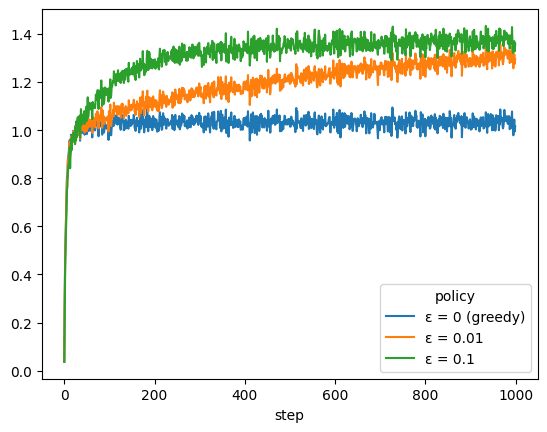

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 9835/6000000 [00:00<01:00, 98342.36it/s]

  0%|          | 19857/6000000 [00:00<01:00, 99443.67it/s]

  0%|          | 29905/6000000 [00:00<00:59, 99915.71it/s]

  1%|          | 39904/6000000 [00:00<00:59, 99944.70it/s]

  1%|          | 50001/6000000 [00:00<00:59, 100182.07it/s]

  1%|          | 60069/6000000 [00:00<00:59, 100350.44it/s]

  1%|          | 70105/6000000 [00:00<01:00, 98340.19it/s] 

  1%|▏         | 80166/6000000 [00:00<00:59, 99051.32it/s]

  2%|▏         | 90252/6000000 [00:00<00:59, 99609.76it/s]

  2%|▏         | 100303/6000000 [00:01<00:59, 99884.14it/s]

  2%|▏         | 110377/6000000 [00:01<00:58, 100144.43it/s]

  2%|▏         | 120417/6000000 [00:01<00:58, 100220.86it/s]

  2%|▏         | 130467/6000000 [00:01<00:58, 100303.52it/s]

  2%|▏         | 140499/6000000 [00:01<00:58, 100261.66it/s]

  3%|▎         | 150532/6000000 [00:01<00:58, 100279.46it/s]

  3%|▎         | 160561/6000000 [00:01<00:58, 100112.42it/s]

  3%|▎         | 170573/6000000 [00:01<00:58, 100007.67it/s]

  3%|▎         | 180575/6000000 [00:01<00:58, 99888.56it/s] 

  3%|▎         | 190569/6000000 [00:01<00:58, 99903.29it/s]

  3%|▎         | 200584/6000000 [00:02<00:58, 99976.13it/s]

  4%|▎         | 210698/6000000 [00:02<00:57, 100323.53it/s]

  4%|▎         | 220731/6000000 [00:02<00:57, 100110.42it/s]

  4%|▍         | 230755/6000000 [00:02<00:57, 100148.40it/s]

  4%|▍         | 240770/6000000 [00:02<00:57, 100096.28it/s]

  4%|▍         | 250780/6000000 [00:02<00:57, 99875.60it/s] 

  4%|▍         | 260768/6000000 [00:02<00:57, 99853.29it/s]

  5%|▍         | 270771/6000000 [00:02<00:57, 99904.10it/s]

  5%|▍         | 280772/6000000 [00:02<00:57, 99933.93it/s]

  5%|▍         | 290766/6000000 [00:02<00:57, 99899.44it/s]

  5%|▌         | 300756/6000000 [00:03<00:57, 99875.94it/s]

  5%|▌         | 310784/6000000 [00:03<00:56, 99996.09it/s]

  5%|▌         | 320784/6000000 [00:03<00:56, 99906.66it/s]

  6%|▌         | 330775/6000000 [00:03<00:56, 99666.21it/s]

  6%|▌         | 340899/6000000 [00:03<00:56, 100135.59it/s]

  6%|▌         | 350986/6000000 [00:03<00:56, 100354.28it/s]

  6%|▌         | 361022/6000000 [00:03<00:56, 100112.71it/s]

  6%|▌         | 371080/6000000 [00:03<00:56, 100252.50it/s]

  6%|▋         | 381192/6000000 [00:03<00:55, 100510.73it/s]

  7%|▋         | 391244/6000000 [00:03<00:55, 100259.21it/s]

  7%|▋         | 401278/6000000 [00:04<00:55, 100282.48it/s]

  7%|▋         | 411330/6000000 [00:04<00:55, 100351.63it/s]

  7%|▋         | 421408/6000000 [00:04<00:55, 100479.43it/s]

  7%|▋         | 431463/6000000 [00:04<00:55, 100498.09it/s]

  7%|▋         | 441513/6000000 [00:04<00:55, 100427.84it/s]

  8%|▊         | 451556/6000000 [00:04<00:55, 100223.77it/s]

  8%|▊         | 461599/6000000 [00:04<00:55, 100283.96it/s]

  8%|▊         | 471722/6000000 [00:04<00:54, 100567.09it/s]

  8%|▊         | 481779/6000000 [00:04<00:54, 100551.68it/s]

  8%|▊         | 491836/6000000 [00:04<00:54, 100555.12it/s]

  8%|▊         | 501892/6000000 [00:05<00:54, 100393.78it/s]

  9%|▊         | 511932/6000000 [00:05<00:54, 100332.04it/s]

  9%|▊         | 521966/6000000 [00:05<00:54, 100165.42it/s]

  9%|▉         | 531983/6000000 [00:05<00:54, 100018.64it/s]

  9%|▉         | 542001/6000000 [00:05<00:54, 99905.16it/s] 

  9%|▉         | 552021/6000000 [00:05<00:54, 99990.67it/s]

  9%|▉         | 562079/6000000 [00:05<00:54, 100164.34it/s]

 10%|▉         | 572159/6000000 [00:05<00:54, 100353.57it/s]

 10%|▉         | 582216/6000000 [00:05<00:53, 100416.45it/s]

 10%|▉         | 592265/6000000 [00:05<00:53, 100438.09it/s]

 10%|█         | 602309/6000000 [00:06<00:53, 100425.13it/s]

 10%|█         | 612357/6000000 [00:06<00:53, 100441.54it/s]

 10%|█         | 622444/6000000 [00:06<00:53, 100568.27it/s]

 11%|█         | 632555/6000000 [00:06<00:53, 100729.34it/s]

 11%|█         | 642661/6000000 [00:06<00:53, 100826.67it/s]

 11%|█         | 652744/6000000 [00:06<00:53, 100786.83it/s]

 11%|█         | 662834/6000000 [00:06<00:52, 100818.27it/s]

 11%|█         | 672950/6000000 [00:06<00:52, 100918.99it/s]

 11%|█▏        | 683042/6000000 [00:06<00:52, 100613.32it/s]

 12%|█▏        | 693114/6000000 [00:06<00:52, 100642.77it/s]

 12%|█▏        | 703214/6000000 [00:07<00:52, 100749.07it/s]

 12%|█▏        | 713304/6000000 [00:07<00:52, 100792.60it/s]

 12%|█▏        | 723385/6000000 [00:07<00:52, 100796.84it/s]

 12%|█▏        | 733476/6000000 [00:07<00:52, 100829.57it/s]

 12%|█▏        | 743560/6000000 [00:07<00:52, 100707.44it/s]

 13%|█▎        | 753649/6000000 [00:07<00:52, 100761.74it/s]

 13%|█▎        | 763726/6000000 [00:07<00:52, 100594.87it/s]

 13%|█▎        | 773786/6000000 [00:07<00:52, 100480.93it/s]

 13%|█▎        | 783835/6000000 [00:07<00:52, 98799.42it/s] 

 13%|█▎        | 793951/6000000 [00:07<00:52, 99497.78it/s]

 13%|█▎        | 803946/6000000 [00:08<00:52, 99631.02it/s]

 14%|█▎        | 813950/6000000 [00:08<00:51, 99750.18it/s]

 14%|█▎        | 823942/6000000 [00:08<00:51, 99799.57it/s]

 14%|█▍        | 833934/6000000 [00:08<00:51, 99832.76it/s]

 14%|█▍        | 844001/6000000 [00:08<00:51, 99919.81it/s]

 14%|█▍        | 854029/6000000 [00:08<00:51, 100024.96it/s]

 14%|█▍        | 864106/6000000 [00:08<00:51, 100247.57it/s]

 15%|█▍        | 874132/6000000 [00:08<00:51, 100240.29it/s]

 15%|█▍        | 884157/6000000 [00:08<00:51, 100145.20it/s]

 15%|█▍        | 894205/6000000 [00:08<00:50, 100244.17it/s]

 15%|█▌        | 904275/6000000 [00:09<00:50, 100377.80it/s]

 15%|█▌        | 914313/6000000 [00:09<00:50, 100252.66it/s]

 15%|█▌        | 924339/6000000 [00:09<00:50, 100167.96it/s]

 16%|█▌        | 934401/6000000 [00:09<00:50, 100302.03it/s]

 16%|█▌        | 944444/6000000 [00:09<00:50, 100339.33it/s]

 16%|█▌        | 954501/6000000 [00:09<00:50, 100408.15it/s]

 16%|█▌        | 964548/6000000 [00:09<00:50, 100423.99it/s]

 16%|█▌        | 974703/6000000 [00:09<00:49, 100759.67it/s]

 16%|█▋        | 984780/6000000 [00:09<00:49, 100507.67it/s]

 17%|█▋        | 994850/6000000 [00:09<00:49, 100563.06it/s]

 17%|█▋        | 1004954/6000000 [00:10<00:49, 100703.95it/s]

 17%|█▋        | 1015025/6000000 [00:10<00:49, 100529.45it/s]

 17%|█▋        | 1025117/6000000 [00:10<00:49, 100646.13it/s]

 17%|█▋        | 1035182/6000000 [00:10<00:49, 100563.13it/s]

 17%|█▋        | 1045276/6000000 [00:10<00:49, 100675.62it/s]

 18%|█▊        | 1055344/6000000 [00:10<00:49, 100566.30it/s]

 18%|█▊        | 1065401/6000000 [00:10<00:49, 100488.21it/s]

 18%|█▊        | 1075450/6000000 [00:10<00:49, 100210.48it/s]

 18%|█▊        | 1085472/6000000 [00:10<00:49, 98629.83it/s] 

 18%|█▊        | 1095546/6000000 [00:10<00:49, 99254.10it/s]

 18%|█▊        | 1105620/6000000 [00:11<00:49, 99695.32it/s]

 19%|█▊        | 1115663/6000000 [00:11<00:48, 99912.47it/s]

 19%|█▉        | 1125797/6000000 [00:11<00:48, 100338.43it/s]

 19%|█▉        | 1135909/6000000 [00:11<00:48, 100571.24it/s]

 19%|█▉        | 1145968/6000000 [00:11<00:48, 100557.58it/s]

 19%|█▉        | 1156025/6000000 [00:11<00:48, 100143.24it/s]

 19%|█▉        | 1166125/6000000 [00:11<00:48, 100396.81it/s]

 20%|█▉        | 1176244/6000000 [00:11<00:47, 100631.88it/s]

 20%|█▉        | 1186308/6000000 [00:11<00:47, 100530.22it/s]

 20%|█▉        | 1196380/6000000 [00:11<00:47, 100585.48it/s]

 20%|██        | 1206439/6000000 [00:12<00:47, 100566.18it/s]

 20%|██        | 1216496/6000000 [00:12<00:47, 100485.09it/s]

 20%|██        | 1226591/6000000 [00:12<00:47, 100623.60it/s]

 21%|██        | 1236654/6000000 [00:12<00:47, 100480.09it/s]

 21%|██        | 1246703/6000000 [00:12<00:47, 100257.66it/s]

 21%|██        | 1256729/6000000 [00:12<00:47, 99789.97it/s] 

 21%|██        | 1266709/6000000 [00:12<00:47, 99491.00it/s]

 21%|██▏       | 1276659/6000000 [00:12<00:47, 99333.71it/s]

 21%|██▏       | 1286593/6000000 [00:12<00:47, 99286.37it/s]

 22%|██▏       | 1296522/6000000 [00:12<00:47, 99238.35it/s]

 22%|██▏       | 1306446/6000000 [00:13<00:47, 99177.70it/s]

 22%|██▏       | 1316364/6000000 [00:13<00:47, 99159.60it/s]

 22%|██▏       | 1326280/6000000 [00:13<00:47, 99015.06it/s]

 22%|██▏       | 1336182/6000000 [00:13<00:47, 98872.37it/s]

 22%|██▏       | 1346070/6000000 [00:13<00:47, 98856.20it/s]

 23%|██▎       | 1356050/6000000 [00:13<00:46, 99136.53it/s]

 23%|██▎       | 1366001/6000000 [00:13<00:46, 99153.83it/s]

 23%|██▎       | 1375930/6000000 [00:13<00:46, 99194.50it/s]

 23%|██▎       | 1385850/6000000 [00:13<00:46, 98691.91it/s]

 23%|██▎       | 1395752/6000000 [00:13<00:46, 98789.02it/s]

 23%|██▎       | 1405632/6000000 [00:14<00:46, 98406.19it/s]

 24%|██▎       | 1415476/6000000 [00:14<00:46, 98413.65it/s]

 24%|██▍       | 1425331/6000000 [00:14<00:46, 98452.13it/s]

 24%|██▍       | 1435177/6000000 [00:14<00:46, 98303.92it/s]

 24%|██▍       | 1445008/6000000 [00:14<00:46, 98228.83it/s]

 24%|██▍       | 1454855/6000000 [00:14<00:46, 98298.51it/s]

 24%|██▍       | 1464685/6000000 [00:14<00:46, 98244.76it/s]

 25%|██▍       | 1474510/6000000 [00:14<00:46, 98016.78it/s]

 25%|██▍       | 1484312/6000000 [00:14<00:47, 95974.16it/s]

 25%|██▍       | 1494166/6000000 [00:14<00:46, 96731.01it/s]

 25%|██▌       | 1503927/6000000 [00:15<00:46, 96989.80it/s]

 25%|██▌       | 1513678/6000000 [00:15<00:46, 97143.09it/s]

 25%|██▌       | 1523470/6000000 [00:15<00:45, 97373.67it/s]

 26%|██▌       | 1533250/6000000 [00:15<00:45, 97499.69it/s]

 26%|██▌       | 1543077/6000000 [00:15<00:45, 97729.52it/s]

 26%|██▌       | 1552925/6000000 [00:15<00:45, 97952.42it/s]

 26%|██▌       | 1562722/6000000 [00:15<00:45, 97917.57it/s]

 26%|██▌       | 1572515/6000000 [00:15<00:45, 97877.07it/s]

 26%|██▋       | 1582304/6000000 [00:15<00:45, 96763.40it/s]

 27%|██▋       | 1592055/6000000 [00:15<00:45, 96984.80it/s]

 27%|██▋       | 1601876/6000000 [00:16<00:45, 97348.09it/s]

 27%|██▋       | 1611703/6000000 [00:16<00:44, 97621.67it/s]

 27%|██▋       | 1621467/6000000 [00:16<00:44, 97496.14it/s]

 27%|██▋       | 1631324/6000000 [00:16<00:44, 97816.07it/s]

 27%|██▋       | 1641115/6000000 [00:16<00:44, 97841.56it/s]

 28%|██▊       | 1650907/6000000 [00:16<00:44, 97864.11it/s]

 28%|██▊       | 1660708/6000000 [00:16<00:44, 97907.44it/s]

 28%|██▊       | 1670539/6000000 [00:16<00:44, 98027.02it/s]

 28%|██▊       | 1680342/6000000 [00:16<00:44, 98014.00it/s]

 28%|██▊       | 1690200/6000000 [00:16<00:43, 98183.39it/s]

 28%|██▊       | 1700022/6000000 [00:17<00:43, 98192.72it/s]

 28%|██▊       | 1709964/6000000 [00:17<00:43, 98560.70it/s]

 29%|██▊       | 1719821/6000000 [00:17<00:43, 98389.23it/s]

 29%|██▉       | 1729723/6000000 [00:17<00:43, 98576.61it/s]

 29%|██▉       | 1739581/6000000 [00:17<00:43, 98471.69it/s]

 29%|██▉       | 1749429/6000000 [00:17<00:43, 98396.55it/s]

 29%|██▉       | 1759269/6000000 [00:17<00:43, 98331.25it/s]

 29%|██▉       | 1769131/6000000 [00:17<00:42, 98415.31it/s]

 30%|██▉       | 1778973/6000000 [00:17<00:42, 98410.27it/s]

 30%|██▉       | 1788815/6000000 [00:17<00:42, 98237.70it/s]

 30%|██▉       | 1798639/6000000 [00:18<00:42, 98001.29it/s]

 30%|███       | 1808445/6000000 [00:18<00:42, 98016.78it/s]

 30%|███       | 1818247/6000000 [00:18<00:42, 98005.32it/s]

 30%|███       | 1828072/6000000 [00:18<00:42, 98076.12it/s]

 31%|███       | 1837881/6000000 [00:18<00:42, 98078.55it/s]

 31%|███       | 1847689/6000000 [00:18<00:42, 97829.76it/s]

 31%|███       | 1857473/6000000 [00:18<00:42, 97669.21it/s]

 31%|███       | 1867241/6000000 [00:18<00:42, 97585.25it/s]

 31%|███▏      | 1877001/6000000 [00:18<00:42, 97485.79it/s]

 31%|███▏      | 1886763/6000000 [00:18<00:42, 97523.61it/s]

 32%|███▏      | 1896516/6000000 [00:19<00:42, 97352.20it/s]

 32%|███▏      | 1906252/6000000 [00:19<00:42, 97283.49it/s]

 32%|███▏      | 1916001/6000000 [00:19<00:41, 97275.01it/s]

 32%|███▏      | 1925842/6000000 [00:19<00:41, 97614.19it/s]

 32%|███▏      | 1935604/6000000 [00:19<00:41, 97527.01it/s]

 32%|███▏      | 1945379/6000000 [00:19<00:41, 97591.60it/s]

 33%|███▎      | 1955142/6000000 [00:19<00:41, 97601.81it/s]

 33%|███▎      | 1965001/6000000 [00:19<00:41, 97726.31it/s]

 33%|███▎      | 1974889/6000000 [00:19<00:41, 98070.76it/s]

 33%|███▎      | 1984697/6000000 [00:19<00:40, 97951.60it/s]

 33%|███▎      | 1994533/6000000 [00:20<00:40, 98071.13it/s]

 33%|███▎      | 2004341/6000000 [00:20<00:41, 97353.95it/s]

 34%|███▎      | 2014078/6000000 [00:20<00:41, 95948.91it/s]

 34%|███▎      | 2023678/6000000 [00:20<00:41, 95352.07it/s]

 34%|███▍      | 2033217/6000000 [00:20<00:42, 94266.27it/s]

 34%|███▍      | 2042648/6000000 [00:20<00:42, 93894.92it/s]

 34%|███▍      | 2052040/6000000 [00:20<00:42, 93447.22it/s]

 34%|███▍      | 2061397/6000000 [00:20<00:42, 93481.18it/s]

 35%|███▍      | 2070780/6000000 [00:20<00:41, 93583.73it/s]

 35%|███▍      | 2080140/6000000 [00:20<00:42, 92251.36it/s]

 35%|███▍      | 2089419/6000000 [00:21<00:42, 92409.18it/s]

 35%|███▍      | 2098793/6000000 [00:21<00:42, 92802.72it/s]

 35%|███▌      | 2108076/6000000 [00:21<00:42, 92480.04it/s]

 35%|███▌      | 2117326/6000000 [00:21<00:42, 92299.50it/s]

 35%|███▌      | 2126558/6000000 [00:21<00:42, 92192.20it/s]

 36%|███▌      | 2135881/6000000 [00:21<00:41, 92501.42it/s]

 36%|███▌      | 2145196/6000000 [00:21<00:41, 92693.53it/s]

 36%|███▌      | 2154466/6000000 [00:21<00:41, 92504.35it/s]

 36%|███▌      | 2163717/6000000 [00:21<00:41, 92381.93it/s]

 36%|███▌      | 2172956/6000000 [00:21<00:41, 92145.66it/s]

 36%|███▋      | 2182171/6000000 [00:22<00:41, 92059.44it/s]

 37%|███▋      | 2191560/6000000 [00:22<00:41, 92605.69it/s]

 37%|███▋      | 2200849/6000000 [00:22<00:40, 92688.28it/s]

 37%|███▋      | 2210119/6000000 [00:22<00:40, 92493.37it/s]

 37%|███▋      | 2219369/6000000 [00:22<00:40, 92419.17it/s]

 37%|███▋      | 2228708/6000000 [00:22<00:40, 92708.80it/s]

 37%|███▋      | 2238001/6000000 [00:22<00:40, 92724.75it/s]

 37%|███▋      | 2247285/6000000 [00:22<00:40, 92759.10it/s]

 38%|███▊      | 2256578/6000000 [00:22<00:40, 92809.67it/s]

 38%|███▊      | 2265860/6000000 [00:22<00:40, 91514.58it/s]

 38%|███▊      | 2275055/6000000 [00:23<00:40, 91642.26it/s]

 38%|███▊      | 2284451/6000000 [00:23<00:40, 92332.07it/s]

 38%|███▊      | 2293687/6000000 [00:23<00:40, 92153.93it/s]

 38%|███▊      | 2302915/6000000 [00:23<00:40, 92189.16it/s]

 39%|███▊      | 2312136/6000000 [00:23<00:40, 92047.22it/s]

 39%|███▊      | 2321387/6000000 [00:23<00:39, 92184.72it/s]

 39%|███▉      | 2330607/6000000 [00:23<00:39, 91947.59it/s]

 39%|███▉      | 2339803/6000000 [00:23<00:39, 91931.47it/s]

 39%|███▉      | 2348997/6000000 [00:23<00:39, 91829.89it/s]

 39%|███▉      | 2358226/6000000 [00:24<00:39, 91966.40it/s]

 39%|███▉      | 2367458/6000000 [00:24<00:39, 92070.86it/s]

 40%|███▉      | 2376713/6000000 [00:24<00:39, 92213.78it/s]

 40%|███▉      | 2386001/6000000 [00:24<00:39, 92296.02it/s]

 40%|███▉      | 2395406/6000000 [00:24<00:38, 92820.11it/s]

 40%|████      | 2404689/6000000 [00:24<00:38, 92591.36it/s]

 40%|████      | 2413949/6000000 [00:24<00:38, 92560.62it/s]

 40%|████      | 2423216/6000000 [00:24<00:38, 92592.54it/s]

 41%|████      | 2432476/6000000 [00:24<00:38, 92496.30it/s]

 41%|████      | 2441787/6000000 [00:24<00:38, 92679.45it/s]

 41%|████      | 2451056/6000000 [00:25<00:38, 92128.48it/s]

 41%|████      | 2460335/6000000 [00:25<00:38, 92324.12it/s]

 41%|████      | 2469612/6000000 [00:25<00:38, 92455.39it/s]

 41%|████▏     | 2478971/6000000 [00:25<00:37, 92792.23it/s]

 41%|████▏     | 2488304/6000000 [00:25<00:37, 92951.91it/s]

 42%|████▏     | 2497600/6000000 [00:25<00:37, 92763.05it/s]

 42%|████▏     | 2506920/6000000 [00:25<00:37, 92893.20it/s]

 42%|████▏     | 2516210/6000000 [00:25<00:37, 92739.83it/s]

 42%|████▏     | 2525485/6000000 [00:25<00:37, 92607.56it/s]

 42%|████▏     | 2534920/6000000 [00:25<00:37, 93124.29it/s]

 42%|████▏     | 2544233/6000000 [00:26<00:37, 91674.67it/s]

 43%|████▎     | 2553518/6000000 [00:26<00:37, 92020.17it/s]

 43%|████▎     | 2562724/6000000 [00:26<00:37, 92027.60it/s]

 43%|████▎     | 2572010/6000000 [00:26<00:37, 92274.25it/s]

 43%|████▎     | 2581314/6000000 [00:26<00:36, 92500.45it/s]

 43%|████▎     | 2590630/6000000 [00:26<00:36, 92695.10it/s]

 43%|████▎     | 2599936/6000000 [00:26<00:36, 92804.23it/s]

 43%|████▎     | 2609339/6000000 [00:26<00:36, 93170.57it/s]

 44%|████▎     | 2618657/6000000 [00:26<00:36, 93151.26it/s]

 44%|████▍     | 2627973/6000000 [00:26<00:36, 92990.70it/s]

 44%|████▍     | 2637273/6000000 [00:27<00:36, 91795.14it/s]

 44%|████▍     | 2646665/6000000 [00:27<00:36, 92425.70it/s]

 44%|████▍     | 2655911/6000000 [00:27<00:36, 92372.12it/s]

 44%|████▍     | 2665151/6000000 [00:27<00:36, 92269.95it/s]

 45%|████▍     | 2674445/6000000 [00:27<00:35, 92469.24it/s]

 45%|████▍     | 2683794/6000000 [00:27<00:35, 92773.42it/s]

 45%|████▍     | 2693079/6000000 [00:27<00:35, 92795.44it/s]

 45%|████▌     | 2702363/6000000 [00:27<00:35, 92806.62it/s]

 45%|████▌     | 2711647/6000000 [00:27<00:35, 92816.12it/s]

 45%|████▌     | 2720929/6000000 [00:27<00:35, 92690.72it/s]

 46%|████▌     | 2730199/6000000 [00:28<00:35, 91325.45it/s]

 46%|████▌     | 2739337/6000000 [00:28<00:35, 91338.94it/s]

 46%|████▌     | 2748577/6000000 [00:28<00:35, 91652.64it/s]

 46%|████▌     | 2757953/6000000 [00:28<00:35, 92279.45it/s]

 46%|████▌     | 2767184/6000000 [00:28<00:35, 92245.50it/s]

 46%|████▋     | 2776411/6000000 [00:28<00:35, 91912.92it/s]

 46%|████▋     | 2785851/6000000 [00:28<00:34, 92653.00it/s]

 47%|████▋     | 2795118/6000000 [00:28<00:34, 92640.28it/s]

 47%|████▋     | 2804383/6000000 [00:28<00:34, 92235.80it/s]

 47%|████▋     | 2813668/6000000 [00:28<00:34, 92418.60it/s]

 47%|████▋     | 2822911/6000000 [00:29<00:34, 92187.77it/s]

 47%|████▋     | 2832146/6000000 [00:29<00:34, 92235.87it/s]

 47%|████▋     | 2841370/6000000 [00:29<00:34, 92154.98it/s]

 48%|████▊     | 2850587/6000000 [00:29<00:34, 92157.72it/s]

 48%|████▊     | 2859803/6000000 [00:29<00:34, 91967.83it/s]

 48%|████▊     | 2869000/6000000 [00:29<00:34, 91654.51it/s]

 48%|████▊     | 2878166/6000000 [00:29<00:34, 91446.80it/s]

 48%|████▊     | 2887311/6000000 [00:29<00:34, 90790.22it/s]

 48%|████▊     | 2896537/6000000 [00:29<00:34, 91226.56it/s]

 48%|████▊     | 2905856/6000000 [00:29<00:33, 91810.89it/s]

 49%|████▊     | 2915096/6000000 [00:30<00:33, 91985.09it/s]

 49%|████▊     | 2924296/6000000 [00:30<00:33, 91874.45it/s]

 49%|████▉     | 2933592/6000000 [00:30<00:33, 92199.13it/s]

 49%|████▉     | 2942813/6000000 [00:30<00:33, 92172.35it/s]

 49%|████▉     | 2952031/6000000 [00:30<00:33, 91375.49it/s]

 49%|████▉     | 2961254/6000000 [00:30<00:33, 91627.54it/s]

 50%|████▉     | 2970551/6000000 [00:30<00:32, 92026.23it/s]

 50%|████▉     | 2979795/6000000 [00:30<00:32, 92149.02it/s]

 50%|████▉     | 2989011/6000000 [00:30<00:32, 92055.39it/s]

 50%|████▉     | 2998244/6000000 [00:30<00:32, 92135.43it/s]

 50%|█████     | 3007487/6000000 [00:31<00:32, 92222.61it/s]

 50%|█████     | 3016710/6000000 [00:31<00:32, 92139.35it/s]

 50%|█████     | 3025925/6000000 [00:31<00:32, 91922.25it/s]

 51%|█████     | 3035161/6000000 [00:31<00:32, 92051.93it/s]

 51%|█████     | 3044369/6000000 [00:31<00:32, 92059.38it/s]

 51%|█████     | 3053576/6000000 [00:31<00:32, 90819.78it/s]

 51%|█████     | 3062881/6000000 [00:31<00:32, 91480.99it/s]

 51%|█████     | 3072033/6000000 [00:31<00:32, 91466.07it/s]

 51%|█████▏    | 3081182/6000000 [00:31<00:32, 91184.36it/s]

 52%|█████▏    | 3090303/6000000 [00:31<00:31, 91129.12it/s]

 52%|█████▏    | 3099445/6000000 [00:32<00:31, 91213.93it/s]

 52%|█████▏    | 3108568/6000000 [00:32<00:31, 91090.44it/s]

 52%|█████▏    | 3117780/6000000 [00:32<00:31, 91397.99it/s]

 52%|█████▏    | 3126946/6000000 [00:32<00:31, 91474.74it/s]

 52%|█████▏    | 3136094/6000000 [00:32<00:31, 91350.18it/s]

 52%|█████▏    | 3145349/6000000 [00:32<00:31, 91707.63it/s]

 53%|█████▎    | 3154521/6000000 [00:32<00:31, 91506.87it/s]

 53%|█████▎    | 3163672/6000000 [00:32<00:31, 90546.97it/s]

 53%|█████▎    | 3172729/6000000 [00:32<00:31, 90161.65it/s]

 53%|█████▎    | 3181747/6000000 [00:32<00:31, 89672.85it/s]

 53%|█████▎    | 3191001/6000000 [00:33<00:31, 90367.50it/s]

 53%|█████▎    | 3200040/6000000 [00:33<00:31, 88785.72it/s]

 53%|█████▎    | 3209216/6000000 [00:33<00:31, 89659.28it/s]

 54%|█████▎    | 3218329/6000000 [00:33<00:30, 90094.69it/s]

 54%|█████▍    | 3227344/6000000 [00:33<00:30, 89947.25it/s]

 54%|█████▍    | 3236648/6000000 [00:33<00:30, 90867.49it/s]

 54%|█████▍    | 3245823/6000000 [00:33<00:30, 91129.23it/s]

 54%|█████▍    | 3255001/6000000 [00:33<00:30, 91249.95it/s]

 54%|█████▍    | 3264266/6000000 [00:33<00:29, 91666.42it/s]

 55%|█████▍    | 3273476/6000000 [00:33<00:29, 91794.92it/s]

 55%|█████▍    | 3282657/6000000 [00:34<00:29, 91673.11it/s]

 55%|█████▍    | 3291851/6000000 [00:34<00:29, 91750.88it/s]

 55%|█████▌    | 3301111/6000000 [00:34<00:29, 92002.70it/s]

 55%|█████▌    | 3310312/6000000 [00:34<00:29, 91691.56it/s]

 55%|█████▌    | 3319535/6000000 [00:34<00:29, 91851.17it/s]

 55%|█████▌    | 3328908/6000000 [00:34<00:28, 92412.09it/s]

 56%|█████▌    | 3338197/6000000 [00:34<00:28, 92554.67it/s]

 56%|█████▌    | 3347453/6000000 [00:34<00:28, 92275.31it/s]

 56%|█████▌    | 3356681/6000000 [00:34<00:28, 92231.88it/s]

 56%|█████▌    | 3366001/6000000 [00:34<00:28, 92411.27it/s]

 56%|█████▋    | 3375387/6000000 [00:35<00:28, 92844.24it/s]

 56%|█████▋    | 3384672/6000000 [00:35<00:28, 91952.43it/s]

 57%|█████▋    | 3394045/6000000 [00:35<00:28, 92480.95it/s]

 57%|█████▋    | 3403508/6000000 [00:35<00:27, 93119.10it/s]

 57%|█████▋    | 3412822/6000000 [00:35<00:27, 92662.14it/s]

 57%|█████▋    | 3422090/6000000 [00:35<00:27, 92267.37it/s]

 57%|█████▋    | 3431464/6000000 [00:35<00:27, 92704.47it/s]

 57%|█████▋    | 3440736/6000000 [00:35<00:27, 92594.89it/s]

 57%|█████▋    | 3449997/6000000 [00:35<00:27, 92488.00it/s]

 58%|█████▊    | 3459247/6000000 [00:35<00:27, 92383.48it/s]

 58%|█████▊    | 3468523/6000000 [00:36<00:27, 92495.99it/s]

 58%|█████▊    | 3477773/6000000 [00:36<00:27, 90762.08it/s]

 58%|█████▊    | 3486976/6000000 [00:36<00:27, 91128.77it/s]

 58%|█████▊    | 3496095/6000000 [00:36<00:27, 91128.52it/s]

 58%|█████▊    | 3505292/6000000 [00:36<00:27, 91377.59it/s]

 59%|█████▊    | 3514502/6000000 [00:36<00:27, 91591.23it/s]

 59%|█████▊    | 3523823/6000000 [00:36<00:26, 92074.02it/s]

 59%|█████▉    | 3533033/6000000 [00:36<00:26, 91646.33it/s]

 59%|█████▉    | 3542257/6000000 [00:36<00:26, 91822.17it/s]

 59%|█████▉    | 3551515/6000000 [00:36<00:26, 92046.95it/s]

 59%|█████▉    | 3560780/6000000 [00:37<00:26, 92226.90it/s]

 60%|█████▉    | 3570004/6000000 [00:37<00:26, 91556.57it/s]

 60%|█████▉    | 3579308/6000000 [00:37<00:26, 91997.74it/s]

 60%|█████▉    | 3588649/6000000 [00:37<00:26, 92419.02it/s]

 60%|█████▉    | 3597908/6000000 [00:37<00:25, 92468.66it/s]

 60%|██████    | 3607156/6000000 [00:37<00:25, 92210.43it/s]

 60%|██████    | 3616500/6000000 [00:37<00:25, 92577.36it/s]

 60%|██████    | 3625759/6000000 [00:37<00:25, 92436.67it/s]

 61%|██████    | 3635004/6000000 [00:37<00:25, 92167.35it/s]

 61%|██████    | 3644327/6000000 [00:37<00:25, 92481.39it/s]

 61%|██████    | 3653706/6000000 [00:38<00:25, 92871.62it/s]

 61%|██████    | 3662994/6000000 [00:38<00:25, 90563.59it/s]

 61%|██████    | 3672189/6000000 [00:38<00:25, 90970.83it/s]

 61%|██████▏   | 3681458/6000000 [00:38<00:25, 91477.66it/s]

 62%|██████▏   | 3690756/6000000 [00:38<00:25, 91924.02it/s]

 62%|██████▏   | 3699954/6000000 [00:38<00:25, 91711.48it/s]

 62%|██████▏   | 3709130/6000000 [00:38<00:24, 91663.82it/s]

 62%|██████▏   | 3718339/6000000 [00:38<00:24, 91789.63it/s]

 62%|██████▏   | 3727523/6000000 [00:38<00:24, 91803.80it/s]

 62%|██████▏   | 3736705/6000000 [00:38<00:24, 91801.99it/s]

 62%|██████▏   | 3745887/6000000 [00:39<00:24, 91572.69it/s]

 63%|██████▎   | 3755046/6000000 [00:39<00:24, 91327.16it/s]

 63%|██████▎   | 3764258/6000000 [00:39<00:24, 91559.97it/s]

 63%|██████▎   | 3773548/6000000 [00:39<00:24, 91958.76it/s]

 63%|██████▎   | 3782745/6000000 [00:39<00:24, 91740.09it/s]

 63%|██████▎   | 3791920/6000000 [00:39<00:24, 91591.24it/s]

 63%|██████▎   | 3801145/6000000 [00:39<00:23, 91785.09it/s]

 64%|██████▎   | 3810432/6000000 [00:39<00:23, 92107.26it/s]

 64%|██████▎   | 3819643/6000000 [00:39<00:23, 92058.08it/s]

 64%|██████▍   | 3828849/6000000 [00:39<00:23, 91974.02it/s]

 64%|██████▍   | 3838047/6000000 [00:40<00:23, 91691.37it/s]

 64%|██████▍   | 3847436/6000000 [00:40<00:23, 92346.46it/s]

 64%|██████▍   | 3856672/6000000 [00:40<00:23, 92171.97it/s]

 64%|██████▍   | 3865972/6000000 [00:40<00:23, 92419.59it/s]

 65%|██████▍   | 3875215/6000000 [00:40<00:23, 92137.72it/s]

 65%|██████▍   | 3884533/6000000 [00:40<00:22, 92449.16it/s]

 65%|██████▍   | 3893779/6000000 [00:40<00:22, 92249.72it/s]

 65%|██████▌   | 3903005/6000000 [00:40<00:22, 91899.38it/s]

 65%|██████▌   | 3912287/6000000 [00:40<00:22, 92171.65it/s]

 65%|██████▌   | 3921657/6000000 [00:41<00:22, 92628.36it/s]

 66%|██████▌   | 3930921/6000000 [00:41<00:22, 91839.79it/s]

 66%|██████▌   | 3940403/6000000 [00:41<00:22, 92725.46it/s]

 66%|██████▌   | 3949678/6000000 [00:41<00:22, 91360.20it/s]

 66%|██████▌   | 3959001/6000000 [00:41<00:22, 91777.11it/s]

 66%|██████▌   | 3968212/6000000 [00:41<00:22, 91875.65it/s]

 66%|██████▋   | 3977433/6000000 [00:41<00:21, 91973.31it/s]

 66%|██████▋   | 3986752/6000000 [00:41<00:21, 92335.11it/s]

 67%|██████▋   | 3995988/6000000 [00:41<00:21, 92110.63it/s]

 67%|██████▋   | 4005238/6000000 [00:41<00:21, 92226.69it/s]

 67%|██████▋   | 4014642/6000000 [00:42<00:21, 92766.97it/s]

 67%|██████▋   | 4023920/6000000 [00:42<00:21, 92700.04it/s]

 67%|██████▋   | 4033293/6000000 [00:42<00:21, 93007.02it/s]

 67%|██████▋   | 4042754/6000000 [00:42<00:20, 93485.10it/s]

 68%|██████▊   | 4052202/6000000 [00:42<00:20, 93781.28it/s]

 68%|██████▊   | 4061598/6000000 [00:42<00:20, 93832.60it/s]

 68%|██████▊   | 4071002/6000000 [00:42<00:20, 93893.54it/s]

 68%|██████▊   | 4080573/6000000 [00:42<00:20, 94437.62it/s]

 68%|██████▊   | 4090017/6000000 [00:42<00:20, 94051.59it/s]

 68%|██████▊   | 4099605/6000000 [00:42<00:20, 94596.71it/s]

 68%|██████▊   | 4109066/6000000 [00:43<00:20, 94485.74it/s]

 69%|██████▊   | 4118515/6000000 [00:43<00:19, 94465.06it/s]

 69%|██████▉   | 4128092/6000000 [00:43<00:19, 94855.05it/s]

 69%|██████▉   | 4137578/6000000 [00:43<00:19, 93122.42it/s]

 69%|██████▉   | 4147199/6000000 [00:43<00:19, 94033.52it/s]

 69%|██████▉   | 4156934/6000000 [00:43<00:19, 95016.90it/s]

 69%|██████▉   | 4166558/6000000 [00:43<00:19, 95380.34it/s]

 70%|██████▉   | 4176100/6000000 [00:43<00:19, 95059.16it/s]

 70%|██████▉   | 4185723/6000000 [00:43<00:19, 95407.45it/s]

 70%|██████▉   | 4195266/6000000 [00:43<00:18, 95253.61it/s]

 70%|███████   | 4204793/6000000 [00:44<00:18, 94625.77it/s]

 70%|███████   | 4214307/6000000 [00:44<00:18, 94778.30it/s]

 70%|███████   | 4223787/6000000 [00:44<00:18, 94659.40it/s]

 71%|███████   | 4233254/6000000 [00:44<00:18, 94368.92it/s]

 71%|███████   | 4242693/6000000 [00:44<00:18, 94371.68it/s]

 71%|███████   | 4252408/6000000 [00:44<00:18, 95199.65it/s]

 71%|███████   | 4261929/6000000 [00:44<00:18, 95050.56it/s]

 71%|███████   | 4271435/6000000 [00:44<00:18, 94851.64it/s]

 71%|███████▏  | 4280921/6000000 [00:44<00:18, 94501.72it/s]

 72%|███████▏  | 4290385/6000000 [00:44<00:18, 94541.00it/s]

 72%|███████▏  | 4299840/6000000 [00:45<00:17, 94542.98it/s]

 72%|███████▏  | 4309362/6000000 [00:45<00:17, 94743.37it/s]

 72%|███████▏  | 4318863/6000000 [00:45<00:17, 94821.89it/s]

 72%|███████▏  | 4328346/6000000 [00:45<00:18, 91510.56it/s]

 72%|███████▏  | 4337903/6000000 [00:45<00:17, 92696.99it/s]

 72%|███████▏  | 4347523/6000000 [00:45<00:17, 93728.88it/s]

 73%|███████▎  | 4357103/6000000 [00:45<00:17, 94339.82it/s]

 73%|███████▎  | 4366651/6000000 [00:45<00:17, 94676.22it/s]

 73%|███████▎  | 4376337/6000000 [00:45<00:17, 95324.75it/s]

 73%|███████▎  | 4386001/6000000 [00:45<00:16, 95638.87it/s]

 73%|███████▎  | 4395570/6000000 [00:46<00:16, 95360.41it/s]

 73%|███████▎  | 4405110/6000000 [00:46<00:16, 94790.52it/s]

 74%|███████▎  | 4414728/6000000 [00:46<00:16, 95204.16it/s]

 74%|███████▎  | 4424251/6000000 [00:46<00:16, 95147.59it/s]

 74%|███████▍  | 4433768/6000000 [00:46<00:16, 94909.40it/s]

 74%|███████▍  | 4443261/6000000 [00:46<00:16, 94850.42it/s]

 74%|███████▍  | 4452846/6000000 [00:46<00:16, 95148.91it/s]

 74%|███████▍  | 4462362/6000000 [00:46<00:16, 94822.30it/s]

 75%|███████▍  | 4472001/6000000 [00:46<00:16, 95247.68it/s]

 75%|███████▍  | 4481613/6000000 [00:46<00:15, 95506.49it/s]

 75%|███████▍  | 4491200/6000000 [00:47<00:15, 95614.22it/s]

 75%|███████▌  | 4501028/6000000 [00:47<00:15, 96412.39it/s]

 75%|███████▌  | 4510670/6000000 [00:47<00:15, 96050.66it/s]

 75%|███████▌  | 4520276/6000000 [00:47<00:15, 95922.14it/s]

 75%|███████▌  | 4529869/6000000 [00:47<00:15, 92848.71it/s]

 76%|███████▌  | 4539285/6000000 [00:47<00:15, 93230.99it/s]

 76%|███████▌  | 4548862/6000000 [00:47<00:15, 93978.49it/s]

 76%|███████▌  | 4558490/6000000 [00:47<00:15, 94658.65it/s]

 76%|███████▌  | 4567966/6000000 [00:47<00:15, 94324.54it/s]

 76%|███████▋  | 4577560/6000000 [00:47<00:15, 94803.92it/s]

 76%|███████▋  | 4587046/6000000 [00:48<00:14, 94705.76it/s]

 77%|███████▋  | 4596556/6000000 [00:48<00:14, 94821.55it/s]

 77%|███████▋  | 4606041/6000000 [00:48<00:14, 94521.44it/s]

 77%|███████▋  | 4615496/6000000 [00:48<00:14, 94462.75it/s]

 77%|███████▋  | 4624944/6000000 [00:48<00:15, 91227.18it/s]

 77%|███████▋  | 4634388/6000000 [00:48<00:14, 92162.64it/s]

 77%|███████▋  | 4644081/6000000 [00:48<00:14, 93563.61it/s]

 78%|███████▊  | 4653454/6000000 [00:48<00:14, 93425.79it/s]

 78%|███████▊  | 4662895/6000000 [00:48<00:14, 93715.89it/s]

 78%|███████▊  | 4672275/6000000 [00:48<00:14, 93571.19it/s]

 78%|███████▊  | 4681638/6000000 [00:49<00:14, 93236.11it/s]

 78%|███████▊  | 4691068/6000000 [00:49<00:13, 93548.47it/s]

 78%|███████▊  | 4700564/6000000 [00:49<00:13, 93968.18it/s]

 79%|███████▊  | 4710118/6000000 [00:49<00:13, 94437.38it/s]

 79%|███████▊  | 4719564/6000000 [00:49<00:13, 94121.78it/s]

 79%|███████▉  | 4729001/6000000 [00:49<00:13, 94004.27it/s]

 79%|███████▉  | 4738464/6000000 [00:49<00:13, 94187.64it/s]

 79%|███████▉  | 4747884/6000000 [00:49<00:13, 94129.41it/s]

 79%|███████▉  | 4757298/6000000 [00:49<00:13, 93774.71it/s]

 79%|███████▉  | 4766810/6000000 [00:49<00:13, 94175.90it/s]

 80%|███████▉  | 4776310/6000000 [00:50<00:12, 94421.51it/s]

 80%|███████▉  | 4785975/6000000 [00:50<00:12, 95087.58it/s]

 80%|███████▉  | 4795485/6000000 [00:50<00:12, 94530.81it/s]

 80%|████████  | 4804940/6000000 [00:50<00:12, 94470.76it/s]

 80%|████████  | 4814388/6000000 [00:50<00:12, 91206.31it/s]

 80%|████████  | 4823996/6000000 [00:50<00:12, 92625.97it/s]

 81%|████████  | 4833467/6000000 [00:50<00:12, 93238.09it/s]

 81%|████████  | 4843001/6000000 [00:50<00:12, 93700.20it/s]

 81%|████████  | 4852383/6000000 [00:50<00:12, 93512.53it/s]

 81%|████████  | 4861743/6000000 [00:51<00:13, 87315.67it/s]

 81%|████████  | 4871187/6000000 [00:51<00:12, 89336.02it/s]

 81%|████████▏ | 4880546/6000000 [00:51<00:12, 90561.44it/s]

 81%|████████▏ | 4889917/6000000 [00:51<00:12, 91477.92it/s]

 82%|████████▏ | 4899106/6000000 [00:51<00:12, 91577.62it/s]

 82%|████████▏ | 4908293/6000000 [00:51<00:12, 88662.43it/s]

 82%|████████▏ | 4917742/6000000 [00:51<00:11, 90353.58it/s]

 82%|████████▏ | 4926853/6000000 [00:51<00:11, 90573.21it/s]

 82%|████████▏ | 4936252/6000000 [00:51<00:11, 91579.66it/s]

 82%|████████▏ | 4945568/6000000 [00:51<00:11, 92046.79it/s]

 83%|████████▎ | 4955001/6000000 [00:52<00:11, 92657.17it/s]

 83%|████████▎ | 4964277/6000000 [00:52<00:11, 92374.57it/s]

 83%|████████▎ | 4973522/6000000 [00:52<00:11, 90952.14it/s]

 83%|████████▎ | 4982855/6000000 [00:52<00:11, 91653.58it/s]

 83%|████████▎ | 4992404/6000000 [00:52<00:10, 92789.61it/s]

 83%|████████▎ | 5001690/6000000 [00:52<00:10, 91910.04it/s]

 84%|████████▎ | 5011188/6000000 [00:52<00:10, 92817.82it/s]

 84%|████████▎ | 5020717/6000000 [00:52<00:10, 93550.00it/s]

 84%|████████▍ | 5030077/6000000 [00:52<00:10, 93434.01it/s]

 84%|████████▍ | 5039500/6000000 [00:52<00:10, 93670.12it/s]

 84%|████████▍ | 5048951/6000000 [00:53<00:10, 93916.16it/s]

 84%|████████▍ | 5058348/6000000 [00:53<00:10, 93930.96it/s]

 84%|████████▍ | 5067805/6000000 [00:53<00:09, 94120.13it/s]

 85%|████████▍ | 5077303/6000000 [00:53<00:09, 94375.76it/s]

 85%|████████▍ | 5087001/6000000 [00:53<00:09, 95033.35it/s]

 85%|████████▍ | 5096505/6000000 [00:53<00:09, 94838.95it/s]

 85%|████████▌ | 5106001/6000000 [00:53<00:09, 94750.68it/s]

 85%|████████▌ | 5115525/6000000 [00:53<00:09, 94896.64it/s]

 85%|████████▌ | 5125015/6000000 [00:53<00:09, 94316.99it/s]

 86%|████████▌ | 5134448/6000000 [00:53<00:09, 94178.49it/s]

 86%|████████▌ | 5144069/6000000 [00:54<00:09, 94783.04it/s]

 86%|████████▌ | 5153548/6000000 [00:54<00:08, 94694.64it/s]

 86%|████████▌ | 5163018/6000000 [00:54<00:08, 93438.42it/s]

 86%|████████▌ | 5172463/6000000 [00:54<00:08, 93736.51it/s]

 86%|████████▋ | 5181865/6000000 [00:54<00:08, 93818.69it/s]

 87%|████████▋ | 5191250/6000000 [00:54<00:08, 91518.55it/s]

 87%|████████▋ | 5200415/6000000 [00:54<00:08, 91294.45it/s]

 87%|████████▋ | 5209792/6000000 [00:54<00:08, 92024.25it/s]

 87%|████████▋ | 5219283/6000000 [00:54<00:08, 92878.98it/s]

 87%|████████▋ | 5228662/6000000 [00:54<00:08, 93148.16it/s]

 87%|████████▋ | 5238081/6000000 [00:55<00:08, 93458.09it/s]

 87%|████████▋ | 5247708/6000000 [00:55<00:07, 94296.17it/s]

 88%|████████▊ | 5257294/6000000 [00:55<00:07, 94761.47it/s]

 88%|████████▊ | 5266925/6000000 [00:55<00:07, 95224.89it/s]

 88%|████████▊ | 5276450/6000000 [00:55<00:07, 94972.92it/s]

 88%|████████▊ | 5285949/6000000 [00:55<00:07, 94240.30it/s]

 88%|████████▊ | 5295394/6000000 [00:55<00:07, 94300.89it/s]

 88%|████████▊ | 5304832/6000000 [00:55<00:07, 94324.39it/s]

 89%|████████▊ | 5314266/6000000 [00:55<00:07, 94264.53it/s]

 89%|████████▊ | 5323694/6000000 [00:55<00:07, 93901.72it/s]

 89%|████████▉ | 5333094/6000000 [00:56<00:07, 93929.15it/s]

 89%|████████▉ | 5342563/6000000 [00:56<00:06, 94156.51it/s]

 89%|████████▉ | 5352001/6000000 [00:56<00:06, 94188.68it/s]

 89%|████████▉ | 5361511/6000000 [00:56<00:06, 94459.14it/s]

 90%|████████▉ | 5370995/6000000 [00:56<00:06, 94570.77it/s]

 90%|████████▉ | 5380453/6000000 [00:56<00:06, 94560.52it/s]

 90%|████████▉ | 5389910/6000000 [00:56<00:06, 90037.45it/s]

 90%|████████▉ | 5399639/6000000 [00:56<00:06, 92137.41it/s]

 90%|█████████ | 5408979/6000000 [00:56<00:06, 92505.93it/s]

 90%|█████████ | 5418316/6000000 [00:56<00:06, 92758.75it/s]

 90%|█████████ | 5427796/6000000 [00:57<00:06, 93362.14it/s]

 91%|█████████ | 5437148/6000000 [00:57<00:06, 91130.89it/s]

 91%|█████████ | 5446282/6000000 [00:57<00:06, 87336.58it/s]

 91%|█████████ | 5455761/6000000 [00:57<00:06, 89467.96it/s]

 91%|█████████ | 5465162/6000000 [00:57<00:05, 90783.71it/s]

 91%|█████████ | 5474507/6000000 [00:57<00:05, 91564.24it/s]

 91%|█████████▏| 5483688/6000000 [00:57<00:05, 90206.70it/s]

 92%|█████████▏| 5493236/6000000 [00:57<00:05, 91750.83it/s]

 92%|█████████▏| 5502798/6000000 [00:57<00:05, 92891.85it/s]

 92%|█████████▏| 5512119/6000000 [00:58<00:05, 92984.36it/s]

 92%|█████████▏| 5521530/6000000 [00:58<00:05, 93318.91it/s]

 92%|█████████▏| 5531036/6000000 [00:58<00:04, 93837.06it/s]

 92%|█████████▏| 5540591/6000000 [00:58<00:04, 94348.58it/s]

 93%|█████████▎| 5550030/6000000 [00:58<00:04, 93854.14it/s]

 93%|█████████▎| 5559552/6000000 [00:58<00:04, 94260.73it/s]

 93%|█████████▎| 5568981/6000000 [00:58<00:04, 94058.96it/s]

 93%|█████████▎| 5578389/6000000 [00:58<00:04, 90971.78it/s]

 93%|█████████▎| 5587824/6000000 [00:58<00:04, 91957.83it/s]

 93%|█████████▎| 5597170/6000000 [00:58<00:04, 92399.51it/s]

 93%|█████████▎| 5606453/6000000 [00:59<00:04, 92526.28it/s]

 94%|█████████▎| 5615959/6000000 [00:59<00:04, 93277.33it/s]

 94%|█████████▍| 5625295/6000000 [00:59<00:04, 93001.16it/s]

 94%|█████████▍| 5634916/6000000 [00:59<00:03, 93954.77it/s]

 94%|█████████▍| 5644316/6000000 [00:59<00:03, 93724.58it/s]

 94%|█████████▍| 5653780/6000000 [00:59<00:03, 93996.75it/s]

 94%|█████████▍| 5663386/6000000 [00:59<00:03, 94612.83it/s]

 95%|█████████▍| 5672850/6000000 [00:59<00:03, 90249.43it/s]

 95%|█████████▍| 5681918/6000000 [00:59<00:03, 87018.24it/s]

 95%|█████████▍| 5691298/6000000 [00:59<00:03, 88950.13it/s]

 95%|█████████▌| 5700913/6000000 [01:00<00:03, 91031.02it/s]

 95%|█████████▌| 5710534/6000000 [01:00<00:03, 92545.12it/s]

 95%|█████████▌| 5719926/6000000 [01:00<00:03, 92948.48it/s]

 95%|█████████▌| 5729243/6000000 [01:00<00:02, 92601.19it/s]

 96%|█████████▌| 5738519/6000000 [01:00<00:02, 91835.46it/s]

 96%|█████████▌| 5747887/6000000 [01:00<00:02, 92379.84it/s]

 96%|█████████▌| 5757472/6000000 [01:00<00:02, 93409.62it/s]

 96%|█████████▌| 5766821/6000000 [01:00<00:02, 89779.38it/s]

 96%|█████████▋| 5776283/6000000 [01:00<00:02, 91183.47it/s]

 96%|█████████▋| 5785627/6000000 [01:00<00:02, 91842.71it/s]

 97%|█████████▋| 5795006/6000000 [01:01<00:02, 92415.26it/s]

 97%|█████████▋| 5804413/6000000 [01:01<00:02, 92904.11it/s]

 97%|█████████▋| 5813923/6000000 [01:01<00:01, 93557.38it/s]

 97%|█████████▋| 5823388/6000000 [01:01<00:01, 93881.73it/s]

 97%|█████████▋| 5832783/6000000 [01:01<00:01, 93730.35it/s]

 97%|█████████▋| 5842172/6000000 [01:01<00:01, 93775.40it/s]

 98%|█████████▊| 5851679/6000000 [01:01<00:01, 94159.54it/s]

 98%|█████████▊| 5861098/6000000 [01:01<00:01, 90422.27it/s]

 98%|█████████▊| 5870408/6000000 [01:01<00:01, 91200.20it/s]

 98%|█████████▊| 5879999/6000000 [01:01<00:01, 92582.97it/s]

 98%|█████████▊| 5889380/6000000 [01:02<00:01, 92945.36it/s]

 98%|█████████▊| 5898742/6000000 [01:02<00:01, 93143.17it/s]

 98%|█████████▊| 5908119/6000000 [01:02<00:00, 93328.48it/s]

 99%|█████████▊| 5917620/6000000 [01:02<00:00, 93828.04it/s]

 99%|█████████▉| 5927128/6000000 [01:02<00:00, 94201.43it/s]

 99%|█████████▉| 5936553/6000000 [01:02<00:00, 94114.87it/s]

 99%|█████████▉| 5945968/6000000 [01:02<00:00, 93967.73it/s]

 99%|█████████▉| 5955475/6000000 [01:02<00:00, 94294.64it/s]

 99%|█████████▉| 5964906/6000000 [01:02<00:00, 91045.27it/s]

100%|█████████▉| 5974285/6000000 [01:03<00:00, 91846.34it/s]

100%|█████████▉| 5983626/6000000 [01:03<00:00, 92305.48it/s]

100%|█████████▉| 5993001/6000000 [01:03<00:00, 92628.98it/s]

100%|██████████| 6000000/6000000 [01:03<00:00, 94822.65it/s]

<Axes: xlabel='step'>

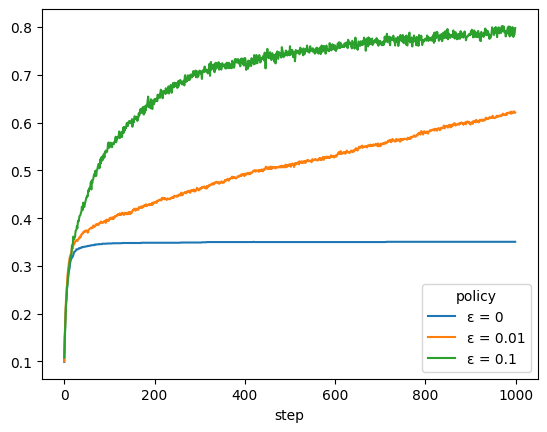

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

  0%|          | 56/180000 [00:00<05:21, 559.85it/s]

  0%|          | 863/180000 [00:00<00:36, 4975.92it/s]

  1%|          | 1614/180000 [00:00<00:29, 6126.56it/s]

  1%|▏         | 2367/180000 [00:00<00:26, 6676.88it/s]

  2%|▏         | 3114/180000 [00:00<00:25, 6962.08it/s]

  2%|▏         | 3852/180000 [00:00<00:24, 7098.55it/s]

  3%|▎         | 4593/180000 [00:00<00:24, 7199.98it/s]

  3%|▎         | 5340/180000 [00:00<00:23, 7280.22it/s]

  3%|▎         | 6069/180000 [00:00<00:24, 7009.47it/s]

  4%|▍         | 6870/180000 [00:01<00:23, 7306.58it/s]

  4%|▍         | 7608/180000 [00:01<00:23, 7323.20it/s]

  5%|▍         | 8349/180000 [00:01<00:23, 7343.05it/s]

  5%|▌         | 9093/180000 [00:01<00:23, 7371.58it/s]

  5%|▌         | 9831/180000 [00:01<00:23, 7370.90it/s]

  6%|▌         | 10569/180000 [00:01<00:23, 7363.06it/s]

  6%|▋         | 11306/180000 [00:01<00:22, 7355.94it/s]

  7%|▋         | 12042/180000 [00:01<00:23, 7056.09it/s]

  7%|▋         | 12844/180000 [00:01<00:22, 7335.77it/s]

  8%|▊         | 13581/180000 [00:01<00:23, 7016.80it/s]

  8%|▊         | 14313/180000 [00:02<00:23, 7099.12it/s]

  8%|▊         | 15042/180000 [00:02<00:23, 7153.96it/s]

  9%|▉         | 15774/180000 [00:02<00:22, 7199.84it/s]

  9%|▉         | 16503/180000 [00:02<00:22, 7220.36it/s]

 10%|▉         | 17235/180000 [00:02<00:22, 7247.94it/s]

 10%|▉         | 17967/180000 [00:02<00:22, 7268.24it/s]

 10%|█         | 18695/180000 [00:02<00:22, 7158.20it/s]

 11%|█         | 19436/180000 [00:02<00:22, 7232.33it/s]

 11%|█         | 20172/180000 [00:02<00:21, 7269.98it/s]

 12%|█▏        | 20901/180000 [00:02<00:21, 7271.50it/s]

 12%|█▏        | 21639/180000 [00:03<00:21, 7299.03it/s]

 12%|█▏        | 22380/180000 [00:03<00:21, 7329.29it/s]

 13%|█▎        | 23118/180000 [00:03<00:21, 7342.36it/s]

 13%|█▎        | 23853/180000 [00:03<00:21, 7328.04it/s]

 14%|█▎        | 24586/180000 [00:03<00:21, 7170.01it/s]

 14%|█▍        | 25319/180000 [00:03<00:21, 7216.98it/s]

 14%|█▍        | 26042/180000 [00:03<00:21, 7218.06it/s]

 15%|█▍        | 26765/180000 [00:03<00:21, 7213.97it/s]

 15%|█▌        | 27487/180000 [00:03<00:21, 7210.68it/s]

 16%|█▌        | 28209/180000 [00:03<00:21, 7204.50it/s]

 16%|█▌        | 28930/180000 [00:04<00:21, 6893.98it/s]

 16%|█▋        | 29655/180000 [00:04<00:21, 6991.95it/s]

 17%|█▋        | 30357/180000 [00:04<00:21, 6902.15it/s]

 17%|█▋        | 31110/180000 [00:04<00:21, 7081.67it/s]

 18%|█▊        | 31848/180000 [00:04<00:20, 7165.69it/s]

 18%|█▊        | 32580/180000 [00:04<00:20, 7210.87it/s]

 19%|█▊        | 33309/180000 [00:04<00:20, 7233.44it/s]

 19%|█▉        | 34034/180000 [00:04<00:20, 7237.95it/s]

 19%|█▉        | 34759/180000 [00:04<00:20, 7231.98it/s]

 20%|█▉        | 35484/180000 [00:04<00:19, 7235.39it/s]

 20%|██        | 36208/180000 [00:05<00:21, 6740.93it/s]

 21%|██        | 36980/180000 [00:05<00:20, 7018.65it/s]

 21%|██        | 37719/180000 [00:05<00:19, 7124.06it/s]

 21%|██▏       | 38457/180000 [00:05<00:19, 7197.95it/s]

 22%|██▏       | 39201/180000 [00:05<00:19, 7264.37it/s]

 22%|██▏       | 39943/180000 [00:05<00:19, 7309.43it/s]

 23%|██▎       | 40683/180000 [00:05<00:18, 7334.87it/s]

 23%|██▎       | 41428/180000 [00:05<00:18, 7368.23it/s]

 23%|██▎       | 42166/180000 [00:05<00:19, 7130.02it/s]

 24%|██▍       | 42943/180000 [00:06<00:18, 7316.20it/s]

 24%|██▍       | 43677/180000 [00:06<00:18, 7314.27it/s]

 25%|██▍       | 44413/180000 [00:06<00:18, 7327.52it/s]

 25%|██▌       | 45147/180000 [00:06<00:18, 7324.57it/s]

 25%|██▌       | 45881/180000 [00:06<00:18, 7321.44it/s]

 26%|██▌       | 46614/180000 [00:06<00:18, 7304.89it/s]

 26%|██▋       | 47345/180000 [00:06<00:18, 7299.07it/s]

 27%|██▋       | 48076/180000 [00:06<00:18, 7011.93it/s]

 27%|██▋       | 48861/180000 [00:06<00:18, 7251.11it/s]

 28%|██▊       | 49589/180000 [00:06<00:17, 7247.68it/s]

 28%|██▊       | 50316/180000 [00:07<00:17, 7239.71it/s]

 28%|██▊       | 51042/180000 [00:07<00:18, 6957.59it/s]

 29%|██▉       | 51774/180000 [00:07<00:18, 7057.20it/s]

 29%|██▉       | 52511/180000 [00:07<00:17, 7148.39it/s]

 30%|██▉       | 53244/180000 [00:07<00:17, 7198.35it/s]

 30%|██▉       | 53979/180000 [00:07<00:17, 7242.21it/s]

 30%|███       | 54705/180000 [00:07<00:17, 7113.58it/s]

 31%|███       | 55432/180000 [00:07<00:17, 7158.97it/s]

 31%|███       | 56156/180000 [00:07<00:17, 7182.04it/s]

 32%|███▏      | 56877/180000 [00:07<00:17, 7188.35it/s]

 32%|███▏      | 57597/180000 [00:08<00:17, 7189.03it/s]

 32%|███▏      | 58317/180000 [00:08<00:16, 7179.01it/s]

 33%|███▎      | 59040/180000 [00:08<00:16, 7193.57it/s]

 33%|███▎      | 59763/180000 [00:08<00:16, 7199.88it/s]

 34%|███▎      | 60484/180000 [00:08<00:16, 7036.66it/s]

 34%|███▍      | 61215/180000 [00:08<00:16, 7111.58it/s]

 34%|███▍      | 61941/180000 [00:08<00:16, 7153.87it/s]

 35%|███▍      | 62678/180000 [00:08<00:16, 7217.22it/s]

 35%|███▌      | 63405/180000 [00:08<00:16, 7231.84it/s]

 36%|███▌      | 64134/180000 [00:08<00:15, 7244.46it/s]

 36%|███▌      | 64860/180000 [00:09<00:15, 7243.78it/s]

 36%|███▋      | 65585/180000 [00:09<00:16, 6935.20it/s]

 37%|███▋      | 66282/180000 [00:09<00:16, 6817.74it/s]

 37%|███▋      | 67024/180000 [00:09<00:16, 6991.25it/s]

 38%|███▊      | 67752/180000 [00:09<00:15, 7070.76it/s]

 38%|███▊      | 68478/180000 [00:09<00:15, 7125.46it/s]

 38%|███▊      | 69205/180000 [00:09<00:15, 7167.42it/s]

 39%|███▉      | 69933/180000 [00:09<00:15, 7197.57it/s]

 39%|███▉      | 70654/180000 [00:09<00:15, 7199.57it/s]

 40%|███▉      | 71376/180000 [00:09<00:15, 7200.10it/s]

 40%|████      | 72097/180000 [00:10<00:15, 6943.26it/s]

 40%|████      | 72867/180000 [00:10<00:14, 7159.59it/s]

 41%|████      | 73599/180000 [00:10<00:14, 7202.89it/s]

 41%|████▏     | 74328/180000 [00:10<00:14, 7228.56it/s]

 42%|████▏     | 75052/180000 [00:10<00:14, 7231.83it/s]

 42%|████▏     | 75776/180000 [00:10<00:14, 7209.84it/s]

 43%|████▎     | 76502/180000 [00:10<00:14, 7224.05it/s]

 43%|████▎     | 77225/180000 [00:10<00:14, 7201.94it/s]

 43%|████▎     | 77954/180000 [00:10<00:14, 7227.24it/s]

 44%|████▎     | 78677/180000 [00:11<00:14, 7104.60it/s]

 44%|████▍     | 79405/180000 [00:11<00:14, 7155.50it/s]

 45%|████▍     | 80122/180000 [00:11<00:14, 6882.08it/s]

 45%|████▍     | 80847/180000 [00:11<00:14, 6985.03it/s]

 45%|████▌     | 81567/180000 [00:11<00:13, 7046.40it/s]

 46%|████▌     | 82294/180000 [00:11<00:13, 7111.78it/s]

 46%|████▌     | 83022/180000 [00:11<00:13, 7156.13it/s]

 47%|████▋     | 83751/180000 [00:11<00:13, 7192.89it/s]

 47%|████▋     | 84471/180000 [00:11<00:13, 7075.72it/s]

 47%|████▋     | 85215/180000 [00:11<00:13, 7179.92it/s]

 48%|████▊     | 85947/180000 [00:12<00:13, 7217.61it/s]

 48%|████▊     | 86670/180000 [00:12<00:12, 7210.12it/s]

 49%|████▊     | 87392/180000 [00:12<00:13, 7012.75it/s]

 49%|████▉     | 88095/180000 [00:12<00:13, 6964.91it/s]

 49%|████▉     | 88815/180000 [00:12<00:12, 7028.26it/s]

 50%|████▉     | 89540/180000 [00:12<00:12, 7093.57it/s]

 50%|█████     | 90251/180000 [00:12<00:12, 6935.12it/s]

 51%|█████     | 91005/180000 [00:12<00:12, 7106.89it/s]

 51%|█████     | 91737/180000 [00:12<00:12, 7165.03it/s]

 51%|█████▏    | 92466/180000 [00:12<00:12, 7200.12it/s]

 52%|█████▏    | 93201/180000 [00:13<00:11, 7240.02it/s]

 52%|█████▏    | 93927/180000 [00:13<00:11, 7242.55it/s]

 53%|█████▎    | 94659/180000 [00:13<00:11, 7265.02it/s]

 53%|█████▎    | 95386/180000 [00:13<00:12, 6988.76it/s]

 53%|█████▎    | 96088/180000 [00:13<00:12, 6808.18it/s]

 54%|█████▍    | 96867/180000 [00:13<00:11, 7087.36it/s]

 54%|█████▍    | 97591/180000 [00:13<00:11, 7131.66it/s]

 55%|█████▍    | 98319/180000 [00:13<00:11, 7170.50it/s]

 55%|█████▌    | 99048/180000 [00:13<00:11, 7202.26it/s]

 55%|█████▌    | 99777/180000 [00:13<00:11, 7222.45it/s]

 56%|█████▌    | 100503/180000 [00:14<00:10, 7230.27it/s]

 56%|█████▌    | 101227/180000 [00:14<00:10, 7230.05it/s]

 57%|█████▋    | 101952/180000 [00:14<00:10, 7233.99it/s]

 57%|█████▋    | 102676/180000 [00:14<00:11, 6846.94it/s]

 57%|█████▋    | 103407/180000 [00:14<00:10, 6977.89it/s]

 58%|█████▊    | 104129/180000 [00:14<00:10, 7047.49it/s]

 58%|█████▊    | 104844/180000 [00:14<00:10, 7072.11it/s]

 59%|█████▊    | 105567/180000 [00:14<00:10, 7112.70it/s]

 59%|█████▉    | 106287/180000 [00:14<00:10, 7135.95it/s]

 59%|█████▉    | 107010/180000 [00:14<00:10, 7158.15it/s]

 60%|█████▉    | 107733/180000 [00:15<00:10, 7178.28it/s]

 60%|██████    | 108452/180000 [00:15<00:10, 7015.57it/s]

 61%|██████    | 109183/180000 [00:15<00:09, 7102.08it/s]

 61%|██████    | 109899/180000 [00:15<00:09, 7115.38it/s]

 61%|██████▏   | 110622/180000 [00:15<00:09, 7143.62it/s]

 62%|██████▏   | 111347/180000 [00:15<00:09, 7174.76it/s]

 62%|██████▏   | 112079/180000 [00:15<00:09, 7217.38it/s]

 63%|██████▎   | 112809/180000 [00:15<00:09, 7241.31it/s]

 63%|██████▎   | 113541/180000 [00:15<00:09, 7262.14it/s]

 63%|██████▎   | 114268/180000 [00:16<00:09, 7048.83it/s]

 64%|██████▍   | 115020/180000 [00:16<00:09, 7181.24it/s]

 64%|██████▍   | 115749/180000 [00:16<00:08, 7212.14it/s]

 65%|██████▍   | 116479/180000 [00:16<00:08, 7237.66it/s]

 65%|██████▌   | 117204/180000 [00:16<00:08, 7230.25it/s]

 66%|██████▌   | 117928/180000 [00:16<00:08, 7232.31it/s]

 66%|██████▌   | 118659/180000 [00:16<00:08, 7254.57it/s]

 66%|██████▋   | 119391/180000 [00:16<00:08, 7268.37it/s]

 67%|██████▋   | 120119/180000 [00:16<00:08, 7025.95it/s]

 67%|██████▋   | 120895/180000 [00:16<00:08, 7239.08it/s]

 68%|██████▊   | 121632/180000 [00:17<00:08, 7276.42it/s]

 68%|██████▊   | 122364/180000 [00:17<00:07, 7284.16it/s]

 68%|██████▊   | 123096/180000 [00:17<00:07, 7290.99it/s]

 69%|██████▉   | 123830/180000 [00:17<00:07, 7304.49it/s]

 69%|██████▉   | 124561/180000 [00:17<00:07, 7288.52it/s]

 70%|██████▉   | 125291/180000 [00:17<00:07, 7276.39it/s]

 70%|███████   | 126019/180000 [00:17<00:07, 6966.55it/s]

 70%|███████   | 126819/180000 [00:17<00:07, 7262.14it/s]

 71%|███████   | 127549/180000 [00:17<00:07, 7268.21it/s]

 71%|███████▏  | 128278/180000 [00:17<00:07, 7252.41it/s]

 72%|███████▏  | 129006/180000 [00:18<00:07, 7254.98it/s]

 72%|███████▏  | 129733/180000 [00:18<00:06, 7248.31it/s]

 72%|███████▏  | 130459/180000 [00:18<00:06, 7245.80it/s]

 73%|███████▎  | 131185/180000 [00:18<00:06, 7239.72it/s]

 73%|███████▎  | 131910/180000 [00:18<00:06, 7229.68it/s]

 74%|███████▎  | 132634/180000 [00:18<00:06, 7090.43it/s]

 74%|███████▍  | 133359/180000 [00:18<00:06, 7132.86it/s]

 74%|███████▍  | 134085/180000 [00:18<00:06, 7165.60it/s]

 75%|███████▍  | 134802/180000 [00:18<00:06, 7162.75it/s]

 75%|███████▌  | 135523/180000 [00:18<00:06, 7176.78it/s]

 76%|███████▌  | 136248/180000 [00:19<00:06, 7193.08it/s]

 76%|███████▌  | 136968/180000 [00:19<00:05, 7183.72it/s]

 76%|███████▋  | 137690/180000 [00:19<00:05, 7194.05it/s]

 77%|███████▋  | 138410/180000 [00:19<00:05, 7017.40it/s]

 77%|███████▋  | 139113/180000 [00:19<00:06, 6807.49it/s]

 78%|███████▊  | 139796/180000 [00:19<00:06, 6247.24it/s]

 78%|███████▊  | 140511/180000 [00:19<00:06, 6491.20it/s]

 78%|███████▊  | 141240/180000 [00:19<00:05, 6713.11it/s]

 79%|███████▉  | 141965/180000 [00:19<00:05, 6866.47it/s]

 79%|███████▉  | 142686/180000 [00:20<00:05, 6963.18it/s]

 80%|███████▉  | 143415/180000 [00:20<00:05, 7054.53it/s]

 80%|████████  | 144124/180000 [00:20<00:05, 6848.66it/s]

 80%|████████  | 144889/180000 [00:20<00:04, 7080.79it/s]

 81%|████████  | 145617/180000 [00:20<00:04, 7135.60it/s]

 81%|████████▏ | 146344/180000 [00:20<00:04, 7175.01it/s]

 82%|████████▏ | 147072/180000 [00:20<00:04, 7203.70it/s]

 82%|████████▏ | 147807/180000 [00:20<00:04, 7245.39it/s]

 83%|████████▎ | 148543/180000 [00:20<00:04, 7278.87it/s]

 83%|████████▎ | 149272/180000 [00:20<00:04, 7275.15it/s]

 83%|████████▎ | 150001/180000 [00:21<00:04, 7104.85it/s]

 84%|████████▎ | 150744/180000 [00:21<00:04, 7195.25it/s]

 84%|████████▍ | 151473/180000 [00:21<00:03, 7220.68it/s]

 85%|████████▍ | 152204/180000 [00:21<00:03, 7246.42it/s]

 85%|████████▍ | 152938/180000 [00:21<00:03, 7273.99it/s]

 85%|████████▌ | 153666/180000 [00:21<00:03, 7267.87it/s]

 86%|████████▌ | 154395/180000 [00:21<00:03, 7267.73it/s]

 86%|████████▌ | 155122/180000 [00:21<00:03, 7252.64it/s]

 87%|████████▋ | 155848/180000 [00:21<00:03, 7252.02it/s]

 87%|████████▋ | 156574/180000 [00:21<00:03, 7096.69it/s]

 87%|████████▋ | 157311/180000 [00:22<00:03, 7172.98it/s]

 88%|████████▊ | 158029/180000 [00:22<00:03, 7160.27it/s]

 88%|████████▊ | 158746/180000 [00:22<00:02, 7145.29it/s]

 89%|████████▊ | 159461/180000 [00:22<00:02, 7140.66it/s]

 89%|████████▉ | 160176/180000 [00:22<00:02, 7133.49it/s]

 89%|████████▉ | 160890/180000 [00:22<00:02, 7095.39it/s]

 90%|████████▉ | 161600/180000 [00:22<00:02, 7081.72it/s]

 90%|█████████ | 162309/180000 [00:22<00:02, 6915.70it/s]

 91%|█████████ | 163059/180000 [00:22<00:02, 7085.11it/s]

 91%|█████████ | 163788/180000 [00:22<00:02, 7145.54it/s]

 91%|█████████▏| 164514/180000 [00:23<00:02, 7177.24it/s]

 92%|█████████▏| 165238/180000 [00:23<00:02, 7195.71it/s]

 92%|█████████▏| 165958/180000 [00:23<00:01, 7190.75it/s]

 93%|█████████▎| 166678/180000 [00:23<00:01, 7187.71it/s]

 93%|█████████▎| 167397/180000 [00:23<00:01, 7154.75it/s]

 93%|█████████▎| 168113/180000 [00:23<00:01, 6913.49it/s]

 94%|█████████▍| 168887/180000 [00:23<00:01, 7153.63it/s]

 94%|█████████▍| 169611/180000 [00:23<00:01, 7178.55it/s]

 95%|█████████▍| 170337/180000 [00:23<00:01, 7198.25it/s]

 95%|█████████▌| 171058/180000 [00:23<00:01, 7150.30it/s]

 95%|█████████▌| 171786/180000 [00:24<00:01, 7184.17it/s]

 96%|█████████▌| 172515/180000 [00:24<00:01, 7215.00it/s]

 96%|█████████▌| 173237/180000 [00:24<00:00, 7205.02it/s]

 97%|█████████▋| 173958/180000 [00:24<00:00, 7204.42it/s]

 97%|█████████▋| 174679/180000 [00:24<00:00, 7051.84it/s]

 97%|█████████▋| 175408/180000 [00:24<00:00, 7120.66it/s]

 98%|█████████▊| 176137/180000 [00:24<00:00, 7170.64it/s]

 98%|█████████▊| 176877/180000 [00:24<00:00, 7235.89it/s]

 99%|█████████▊| 177615/180000 [00:24<00:00, 7273.09it/s]

 99%|█████████▉| 178351/180000 [00:24<00:00, 7298.60it/s]

 99%|█████████▉| 179083/180000 [00:25<00:00, 7304.60it/s]

100%|█████████▉| 179820/180000 [00:25<00:00, 7318.04it/s]

100%|██████████| 180000/180000 [00:25<00:00, 7141.85it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.